In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import torch
from learning_dynamics.data_modules import PendulumDataModule
from learning_dynamics.models import PendulumPEGPVAEModel, Encoder, Decoder
from learning_dynamics.callbacks import PendulumPEGPVAEPlotting
import wandb
import lightning as L
torch.set_default_dtype(torch.float64)

In [3]:
# run = wandb.init(project="PEGP-VAE", name=f"Physics_0_{int(time.time())}")
wandb_logger = None #WandbLogger()

In [4]:
train_data_path = '../data/ODEs/pendulum/linear.pkl'

In [5]:
data_module = PendulumDataModule(train_data_path=train_data_path)
data_module.setup("fit")

In [6]:
next(iter(data_module.train_dataloader()))[0].shape

torch.Size([32, 60, 40, 80])

In [12]:
type(data_module.train_dataset.frames)

numpy.ndarray

In [6]:
# params
width = 80
height = 40
embed_dim = 64
latent_dim = 1
dt = 0.1
val_check = 100
batch_size = 32
max_epochs = 6000

In [7]:
encoder = Encoder(width, height, embed_dim, latent_dim)
decoder = Decoder(width, height, embed_dim, latent_dim)

In [8]:
model = PendulumPEGPVAEModel(encoder, decoder, dt)

In [9]:
trainer = L.Trainer(max_epochs=max_epochs, callbacks=[PendulumPEGPVAEPlotting(dt)], check_val_every_n_epoch=val_check, logger=wandb_logger)

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2025-03-20 11:20:52.232171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742484052.243868  316039 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742484052.247312  316039 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-20 11:20:52.262438: I tensorflow/core/platform/cpu_feature_guard.

Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

/home/kendra/miniconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Frequency tensor(0.8326, device='cuda:0') 
Damping tensor(0.4163, device='cuda:0')


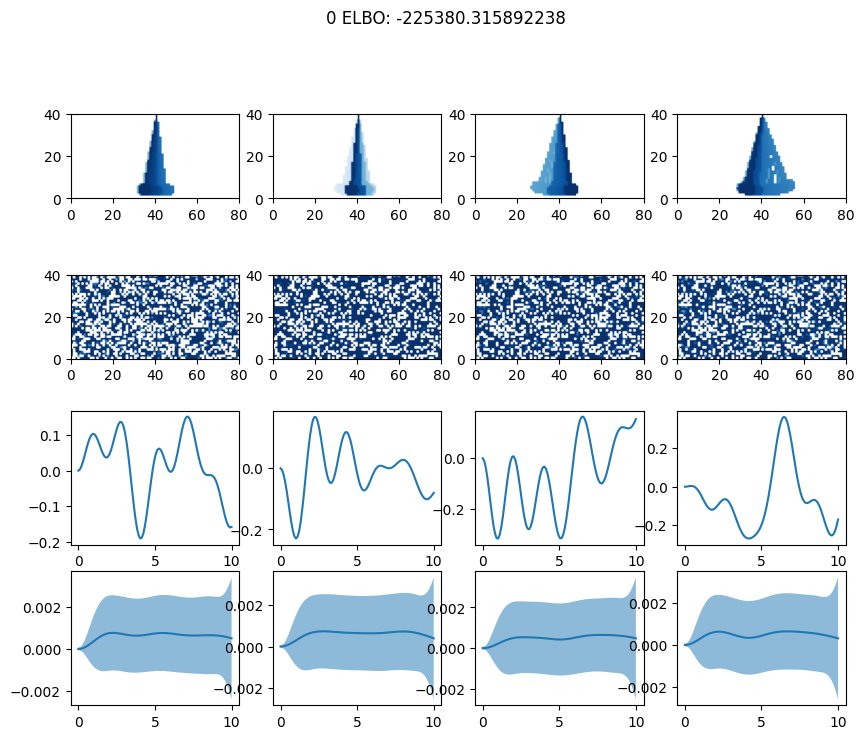

Frequency tensor(0.8326, device='cuda:0') 
Damping tensor(0.4163, device='cuda:0')


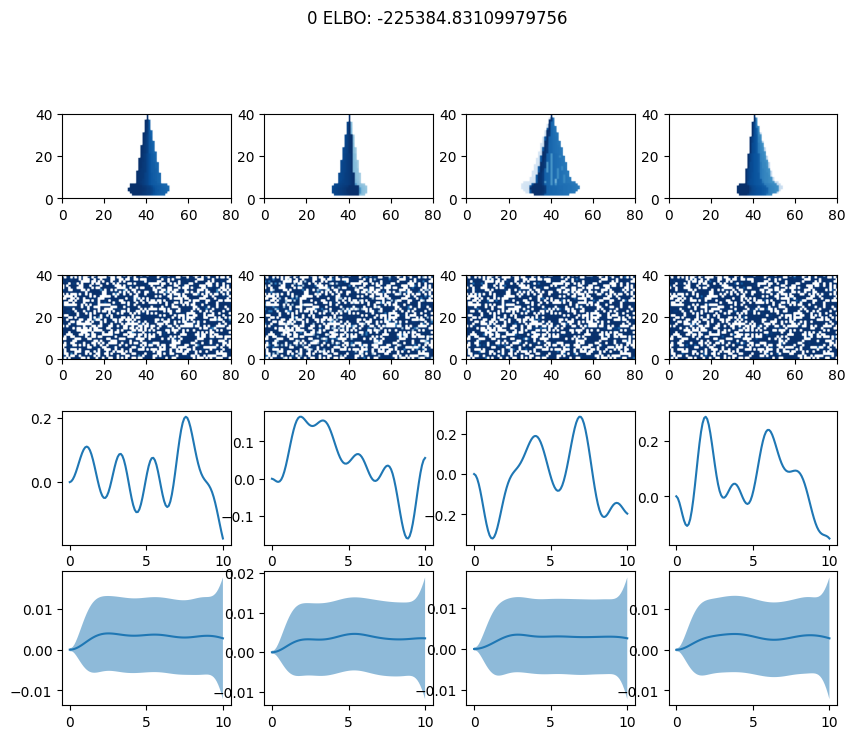

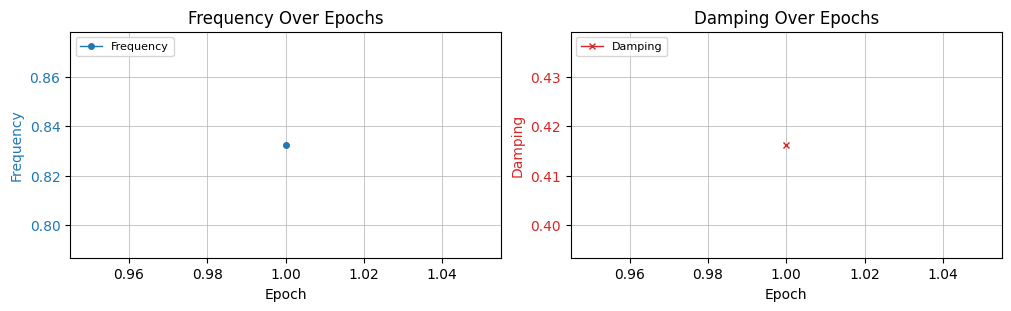

/home/kendra/miniconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/home/kendra/miniconda3/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (7) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Frequency tensor(0.6818, device='cuda:0') 
Damping tensor(0.3961, device='cuda:0')


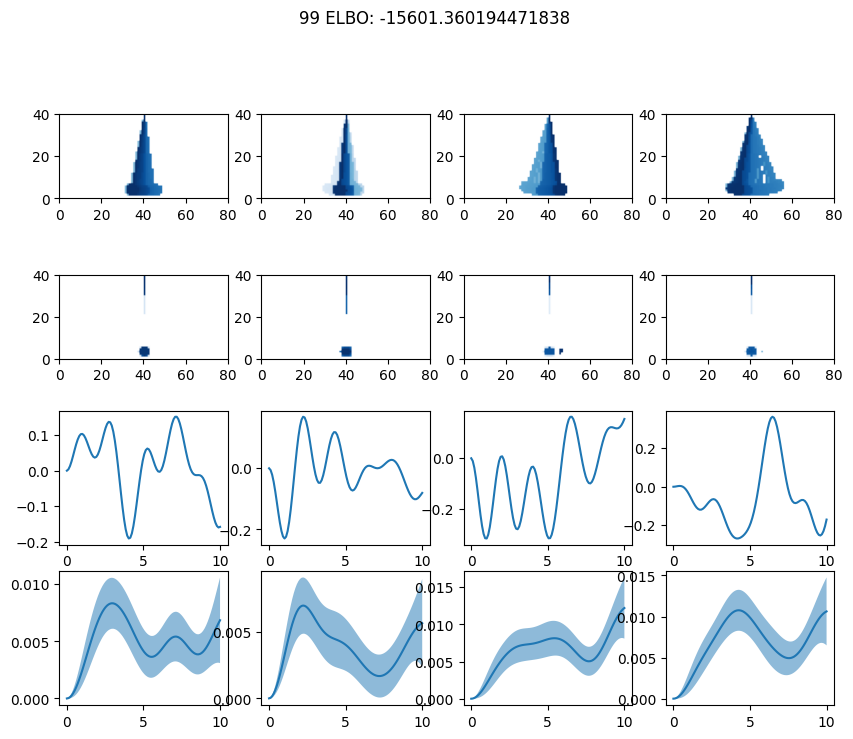

Frequency tensor(0.6818, device='cuda:0') 
Damping tensor(0.3961, device='cuda:0')


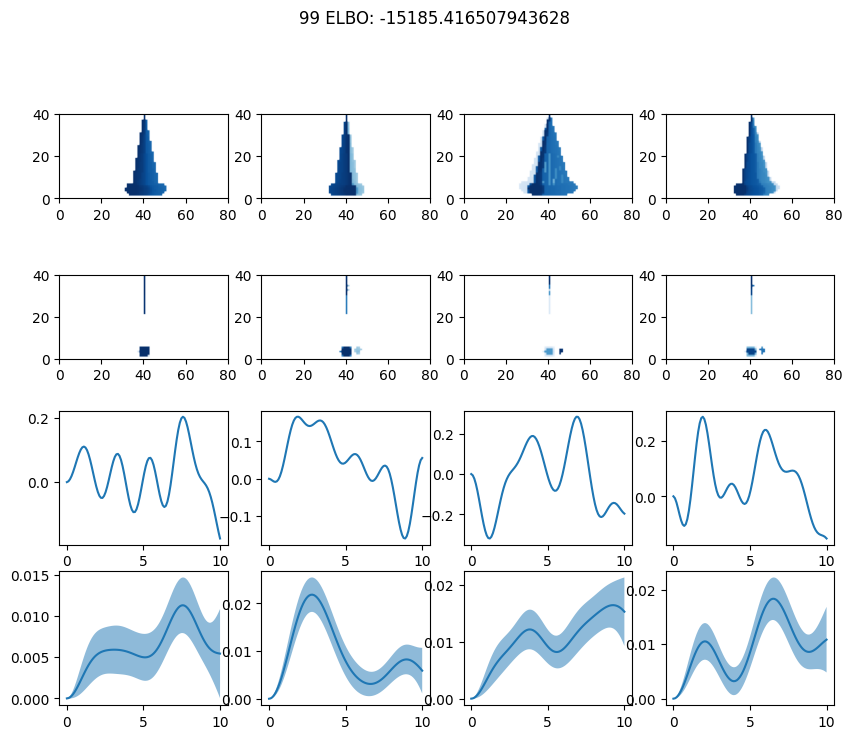

Frequency tensor(0.6818, device='cuda:0') 
Damping tensor(0.3961, device='cuda:0')


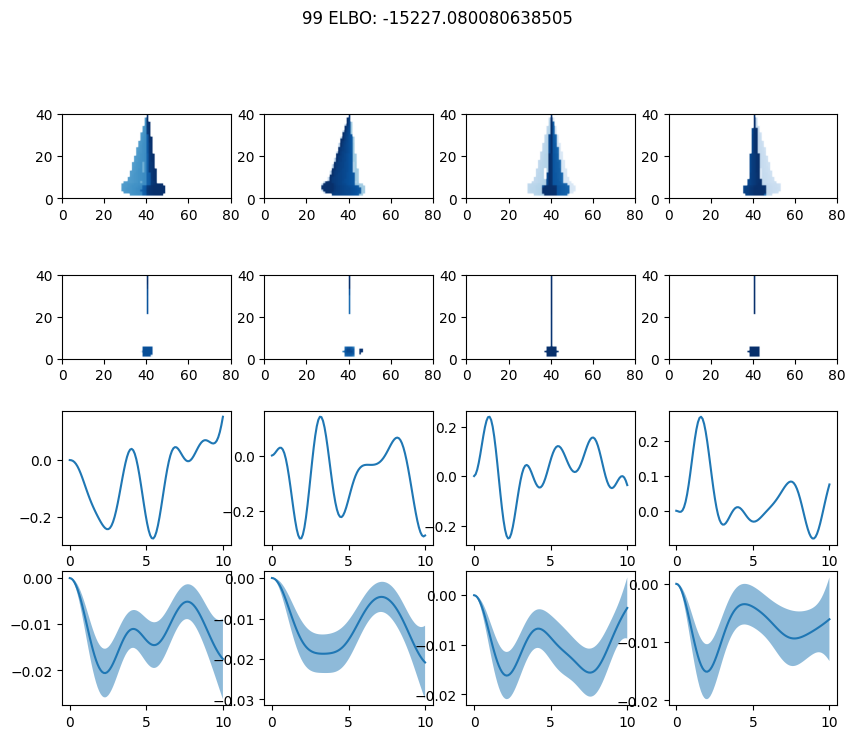

Frequency tensor(0.6818, device='cuda:0') 
Damping tensor(0.3961, device='cuda:0')


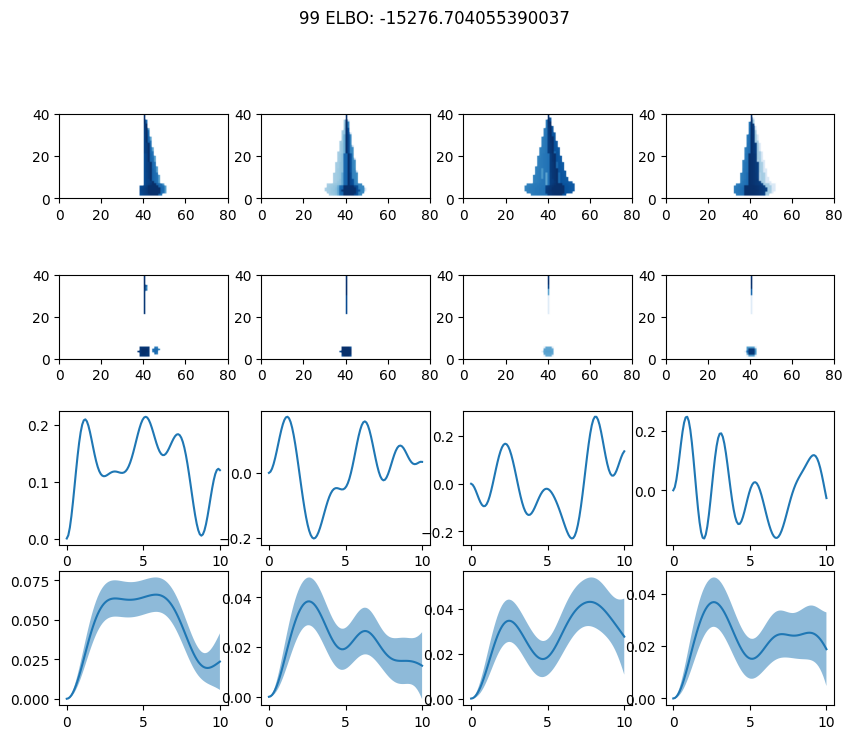

Frequency tensor(0.6818, device='cuda:0') 
Damping tensor(0.3961, device='cuda:0')


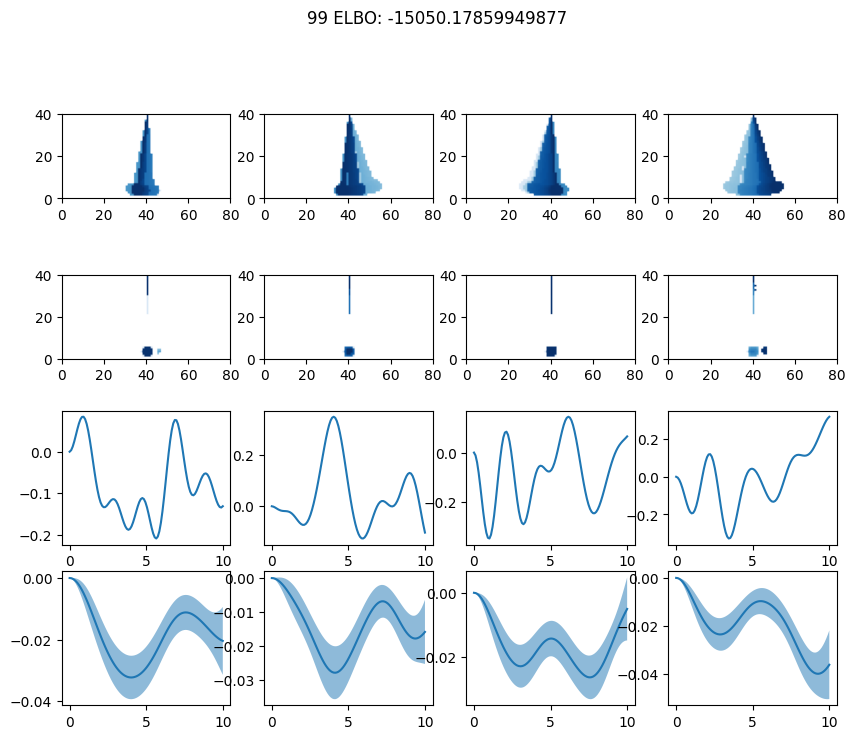

Frequency tensor(0.6818, device='cuda:0') 
Damping tensor(0.3961, device='cuda:0')


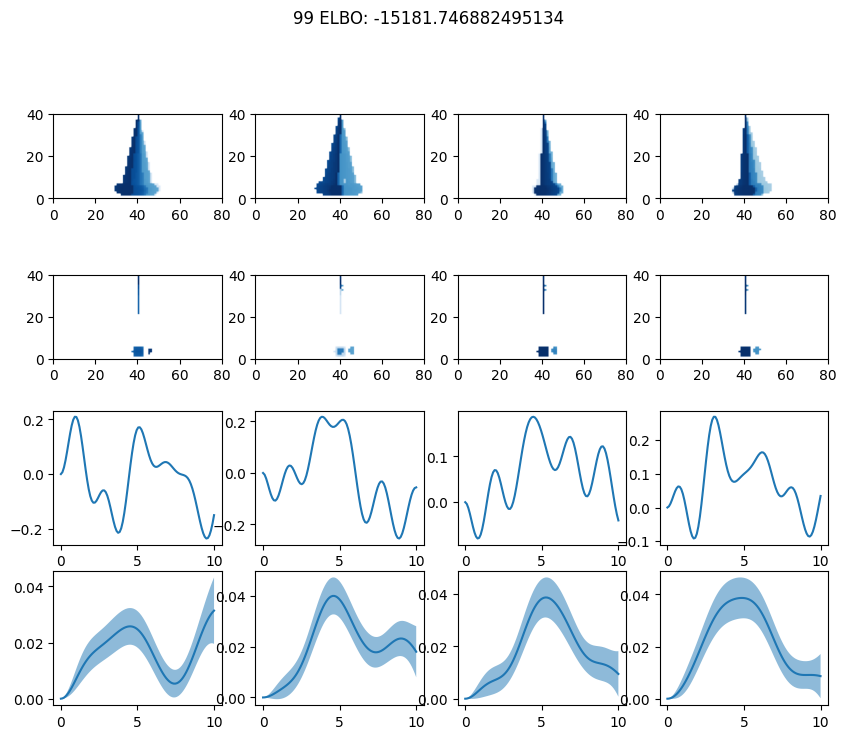

Frequency tensor(0.6818, device='cuda:0') 
Damping tensor(0.3961, device='cuda:0')


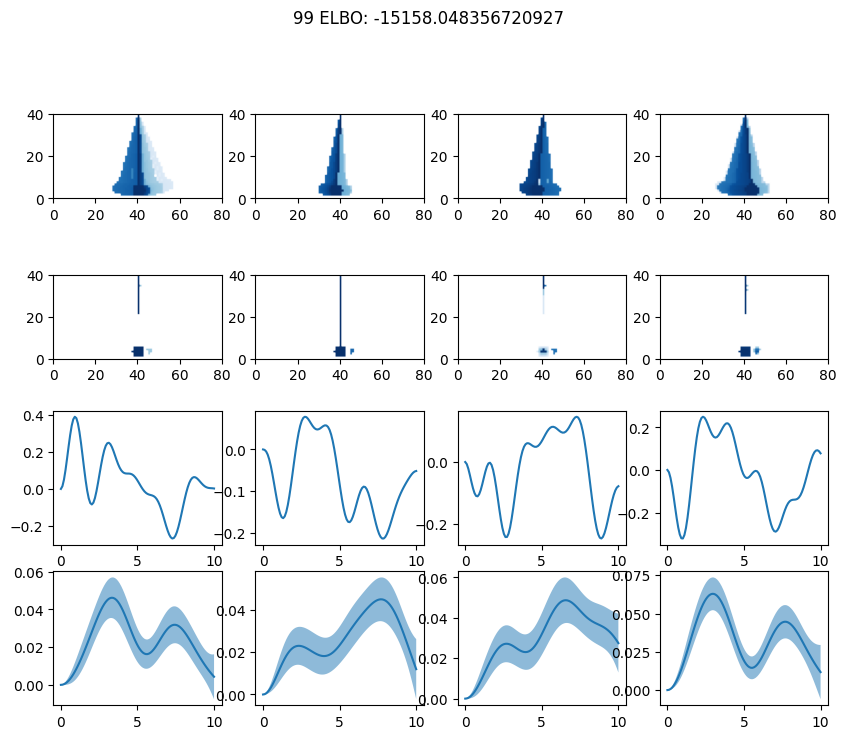

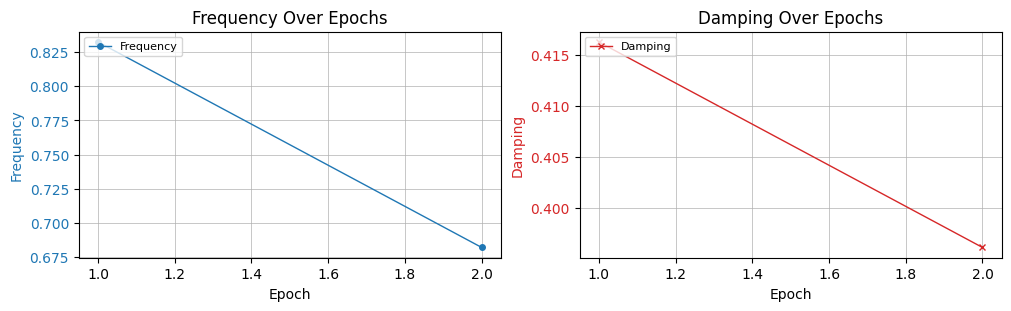

Validation: |                                             | 0/? [00:00<?, ?it/s]

Frequency tensor(0.6778, device='cuda:0') 
Damping tensor(0.4318, device='cuda:0')


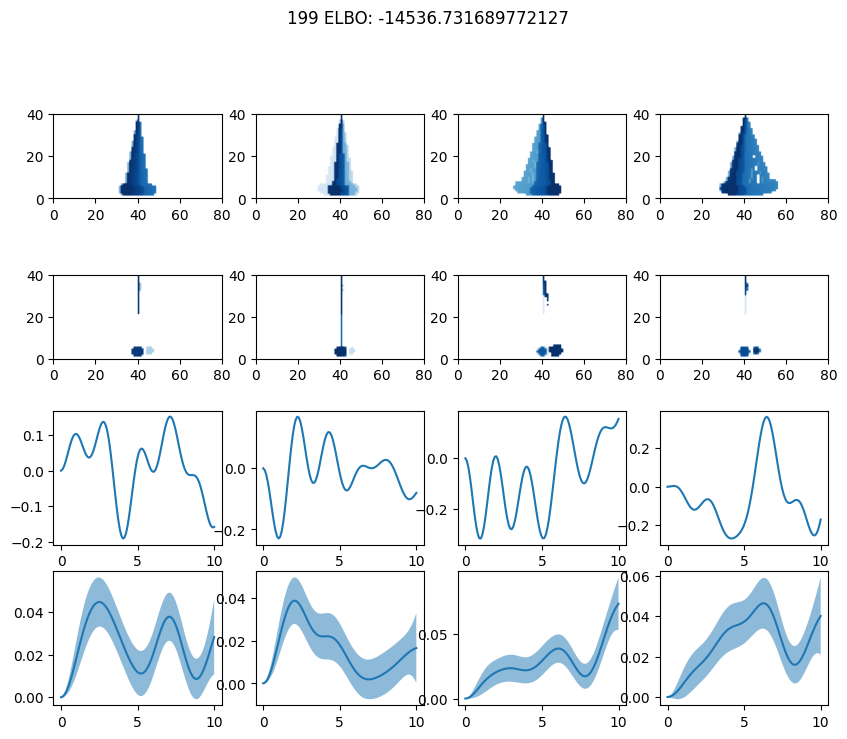

Frequency tensor(0.6778, device='cuda:0') 
Damping tensor(0.4318, device='cuda:0')


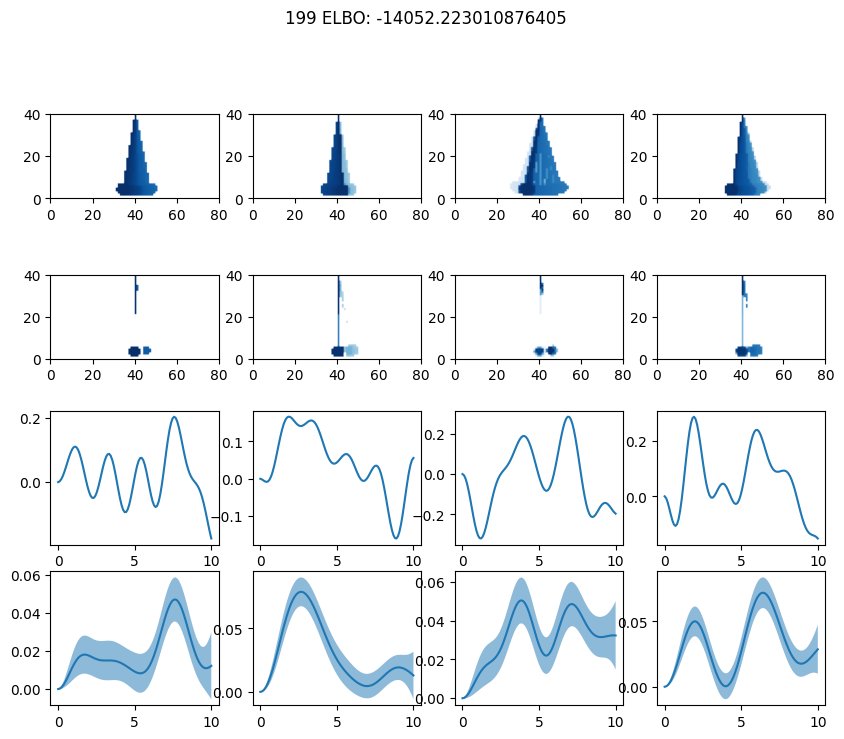

Frequency tensor(0.6778, device='cuda:0') 
Damping tensor(0.4318, device='cuda:0')


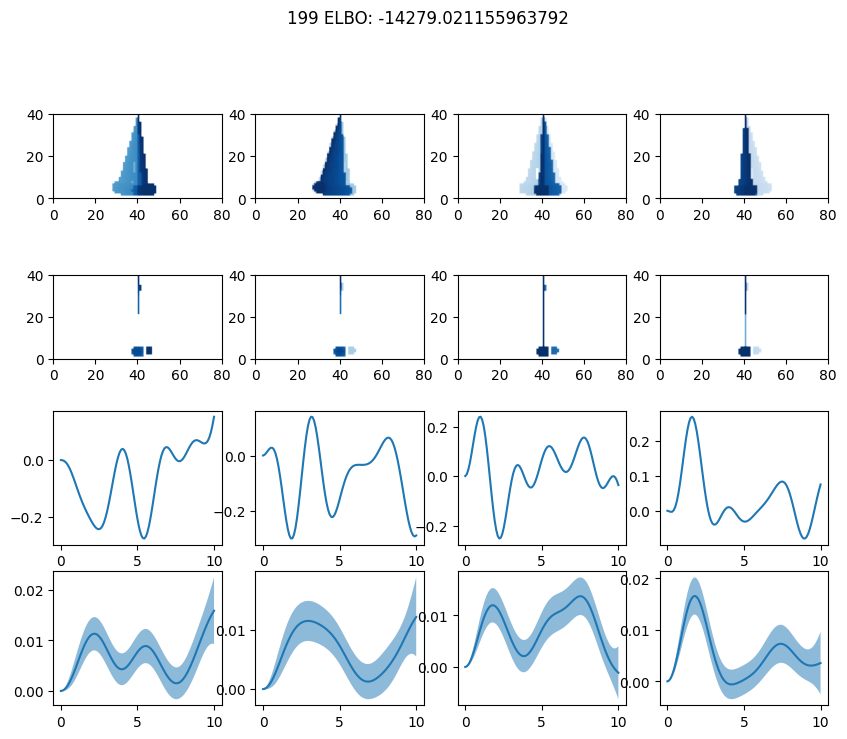

Frequency tensor(0.6778, device='cuda:0') 
Damping tensor(0.4318, device='cuda:0')


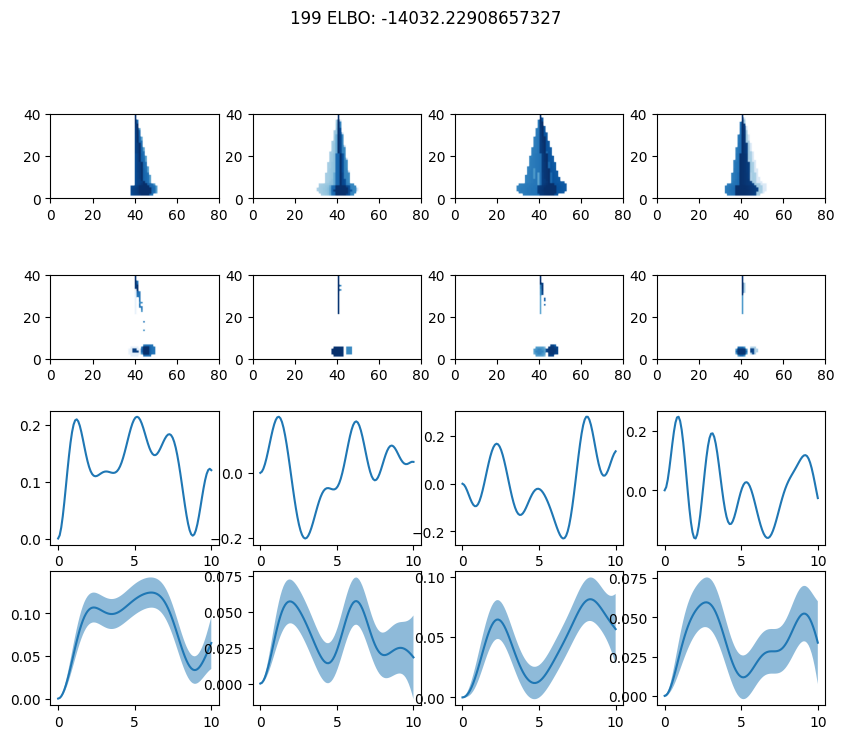

Frequency tensor(0.6778, device='cuda:0') 
Damping tensor(0.4318, device='cuda:0')


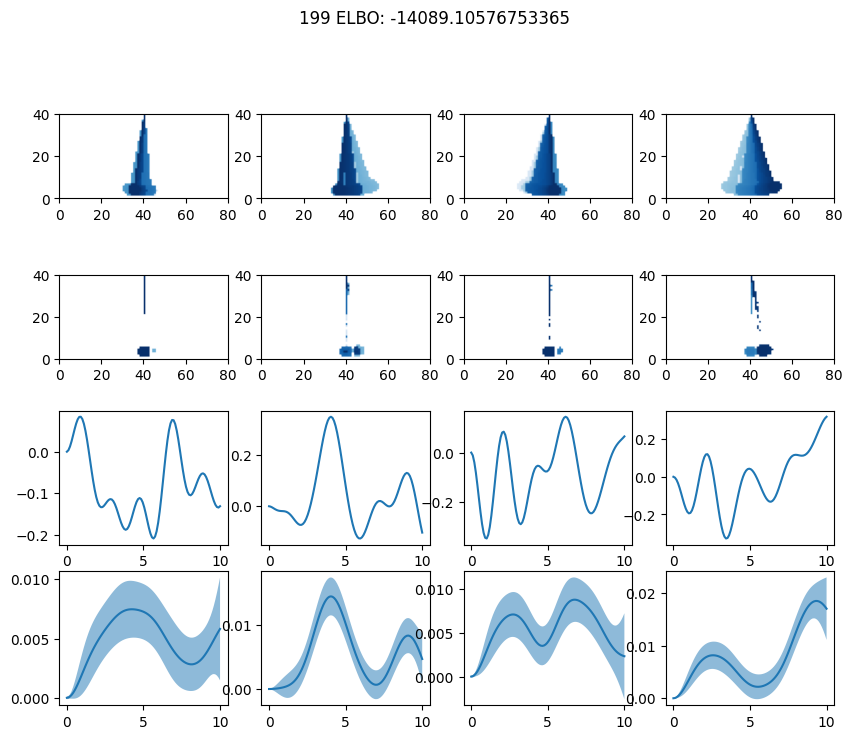

Frequency tensor(0.6778, device='cuda:0') 
Damping tensor(0.4318, device='cuda:0')


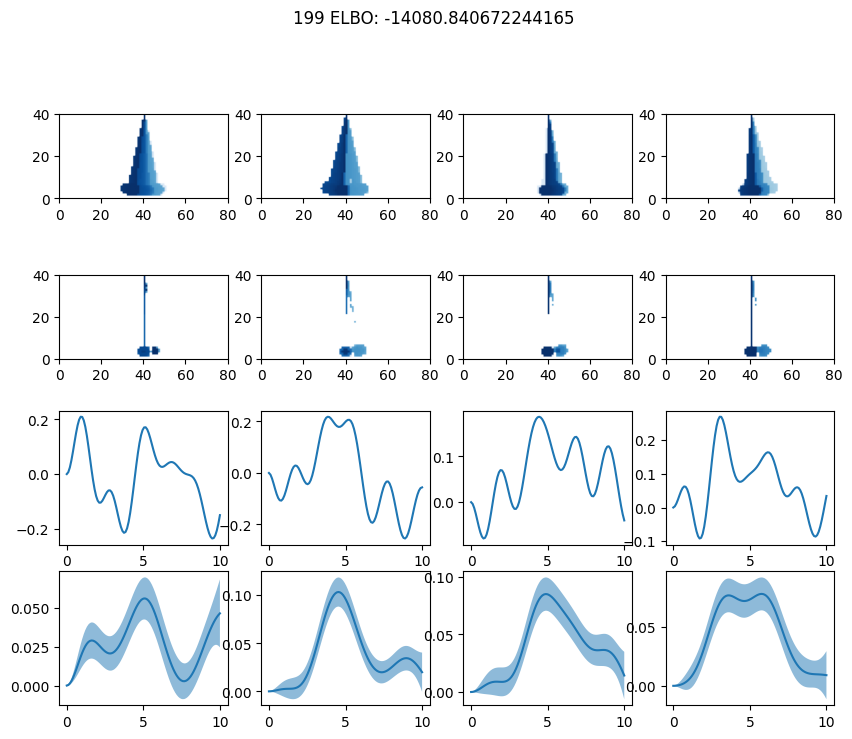

Frequency tensor(0.6778, device='cuda:0') 
Damping tensor(0.4318, device='cuda:0')


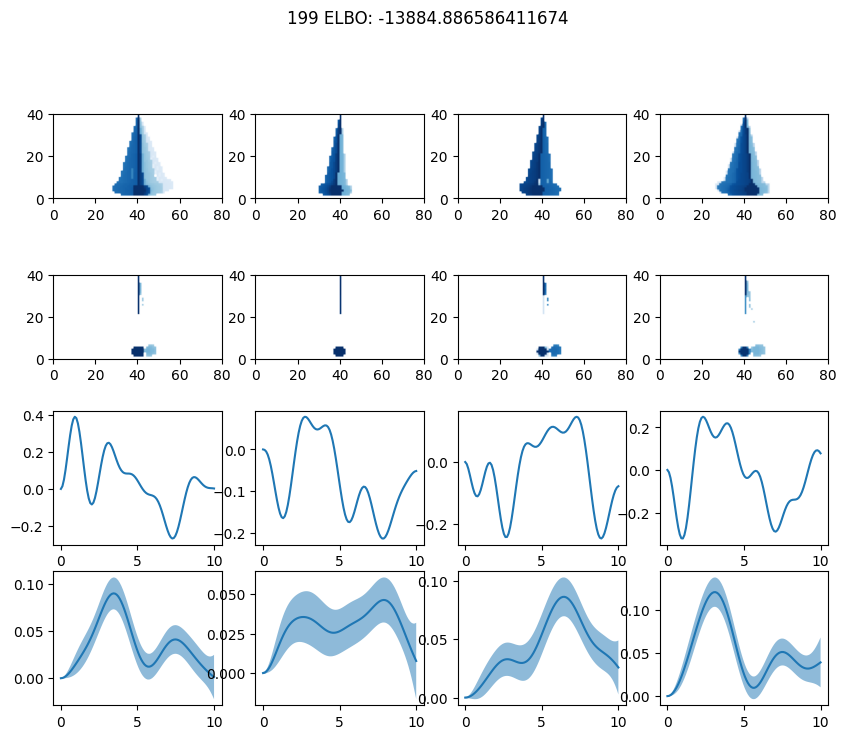

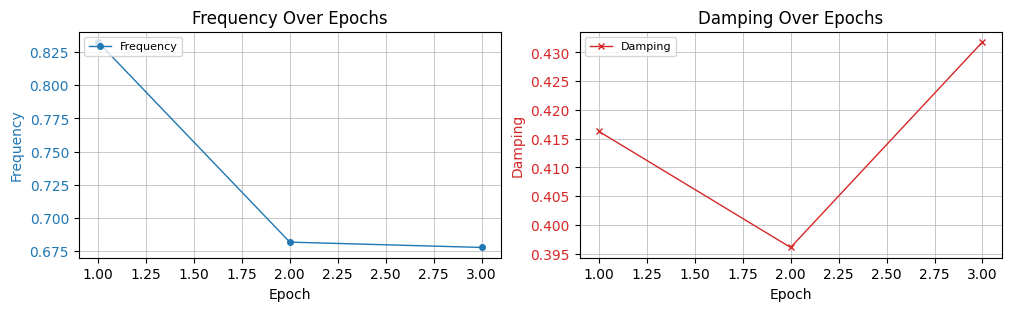

Validation: |                                             | 0/? [00:00<?, ?it/s]

Frequency tensor(0.7466, device='cuda:0') 
Damping tensor(0.5205, device='cuda:0')


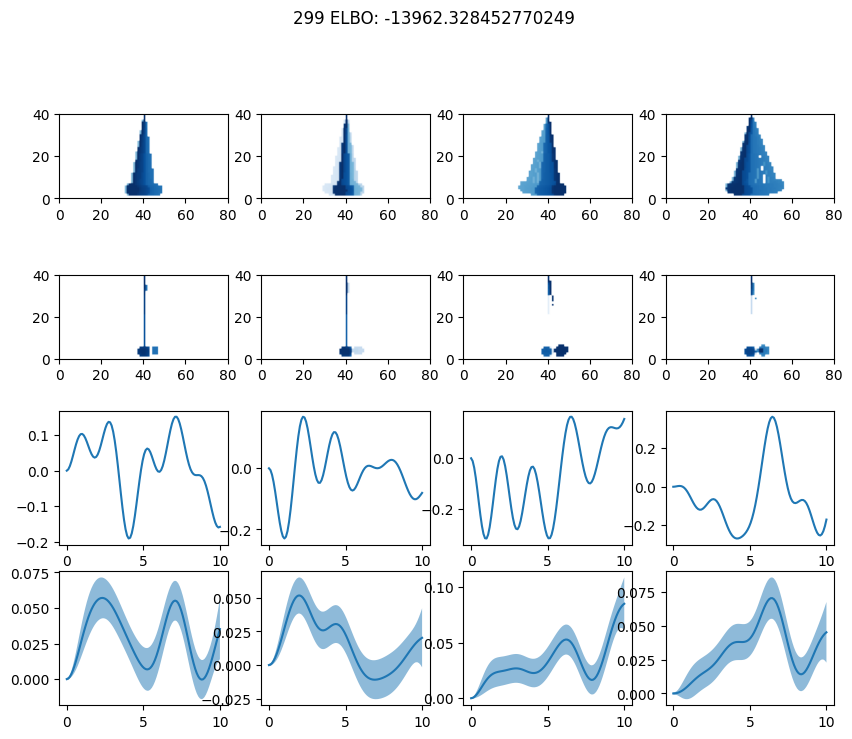

Frequency tensor(0.7466, device='cuda:0') 
Damping tensor(0.5205, device='cuda:0')


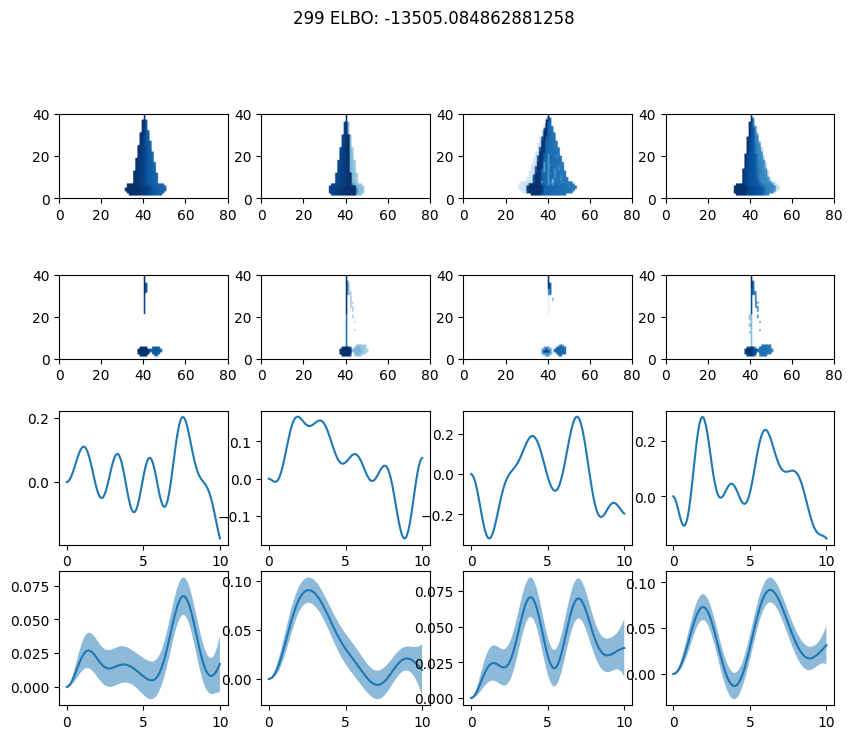

Frequency tensor(0.7466, device='cuda:0') 
Damping tensor(0.5205, device='cuda:0')


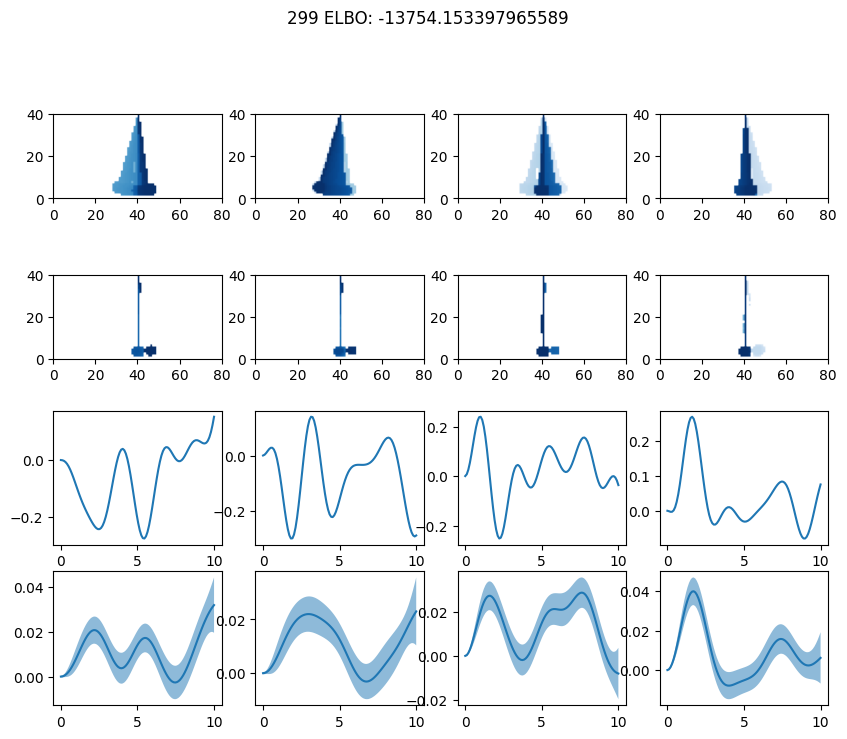

Frequency tensor(0.7466, device='cuda:0') 
Damping tensor(0.5205, device='cuda:0')


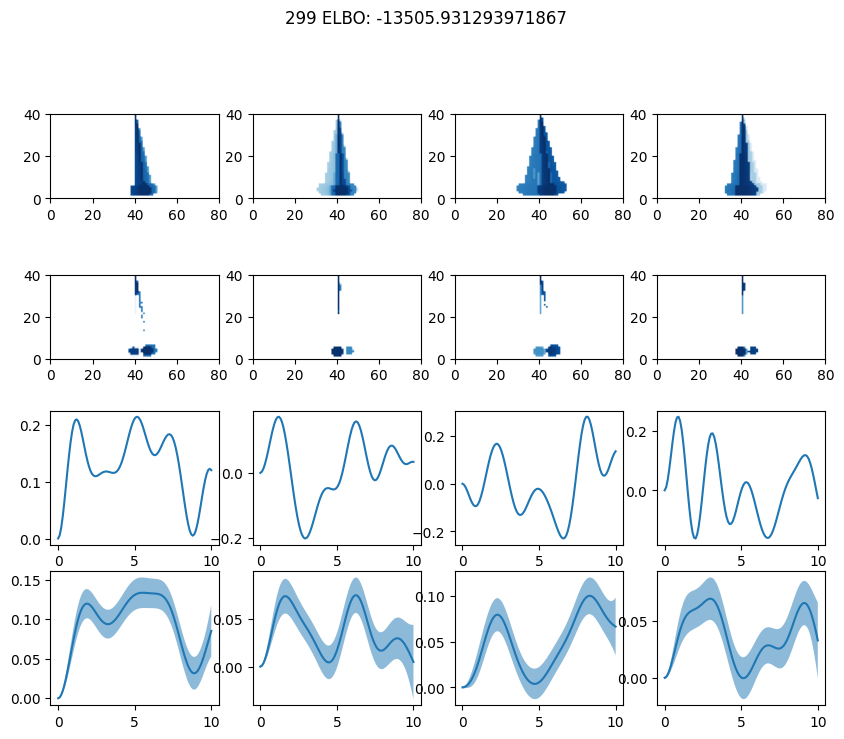

Frequency tensor(0.7466, device='cuda:0') 
Damping tensor(0.5205, device='cuda:0')


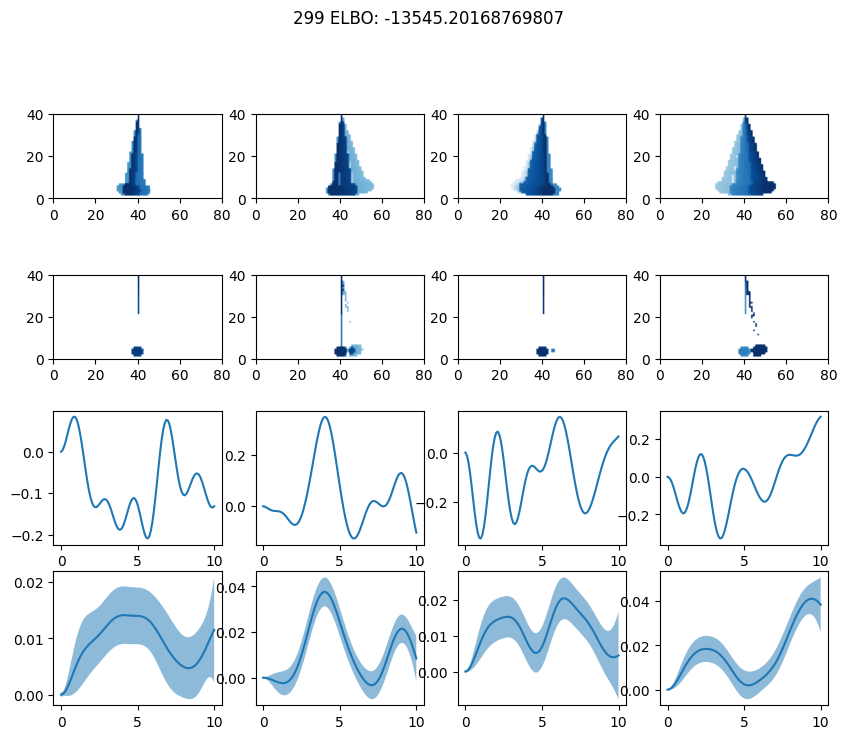

Frequency tensor(0.7466, device='cuda:0') 
Damping tensor(0.5205, device='cuda:0')


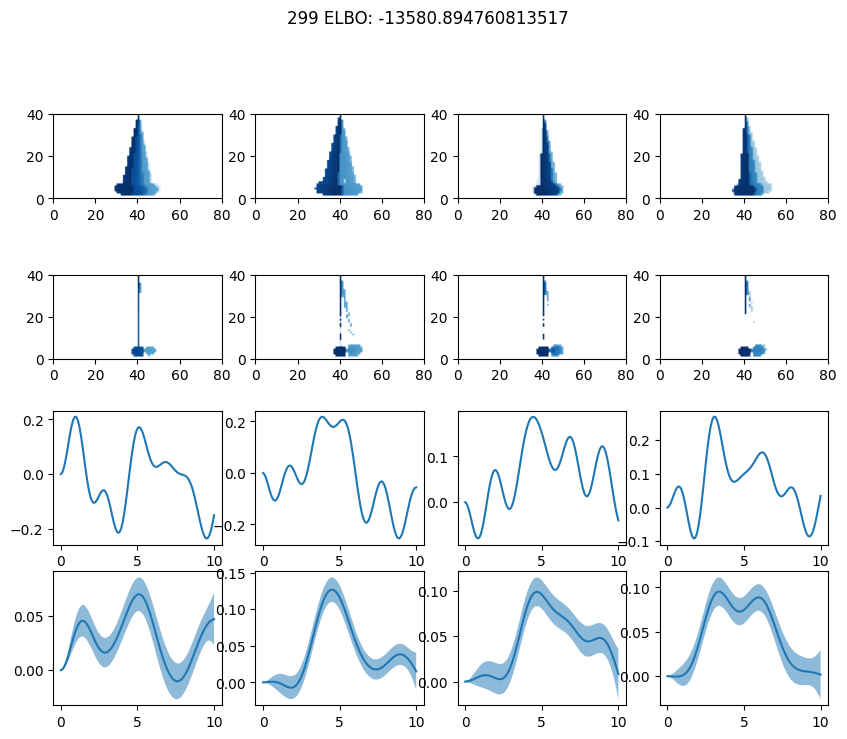

Frequency tensor(0.7466, device='cuda:0') 
Damping tensor(0.5205, device='cuda:0')


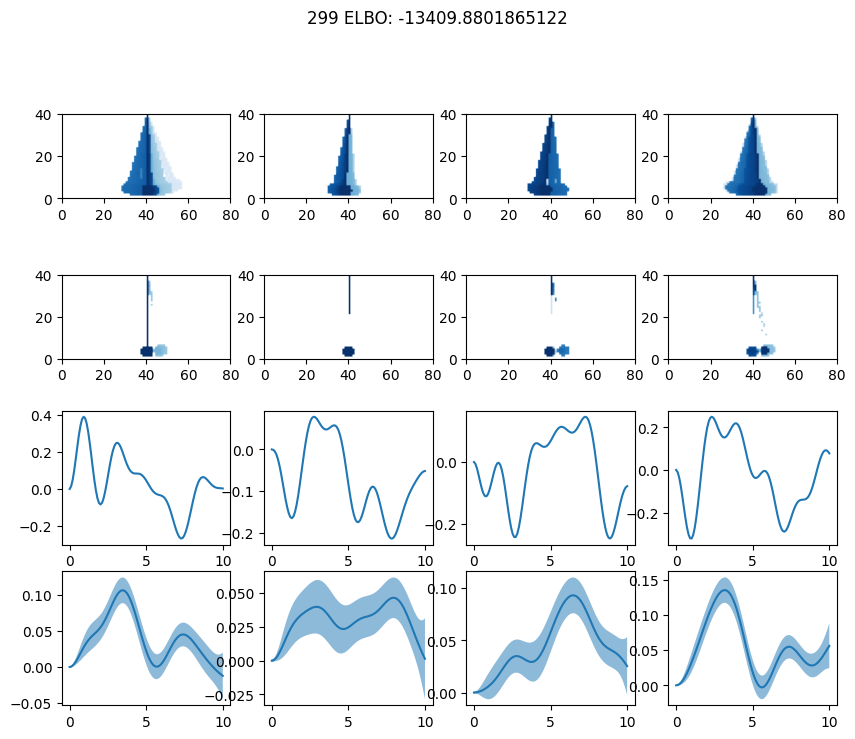

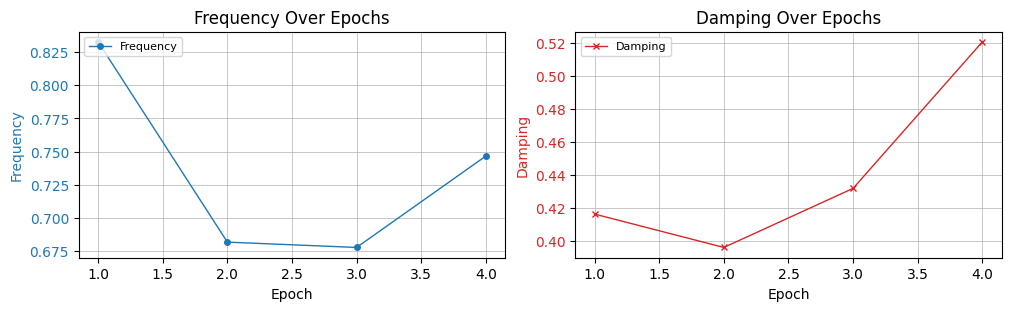

Validation: |                                             | 0/? [00:00<?, ?it/s]

Frequency tensor(0.8870, device='cuda:0') 
Damping tensor(0.4936, device='cuda:0')


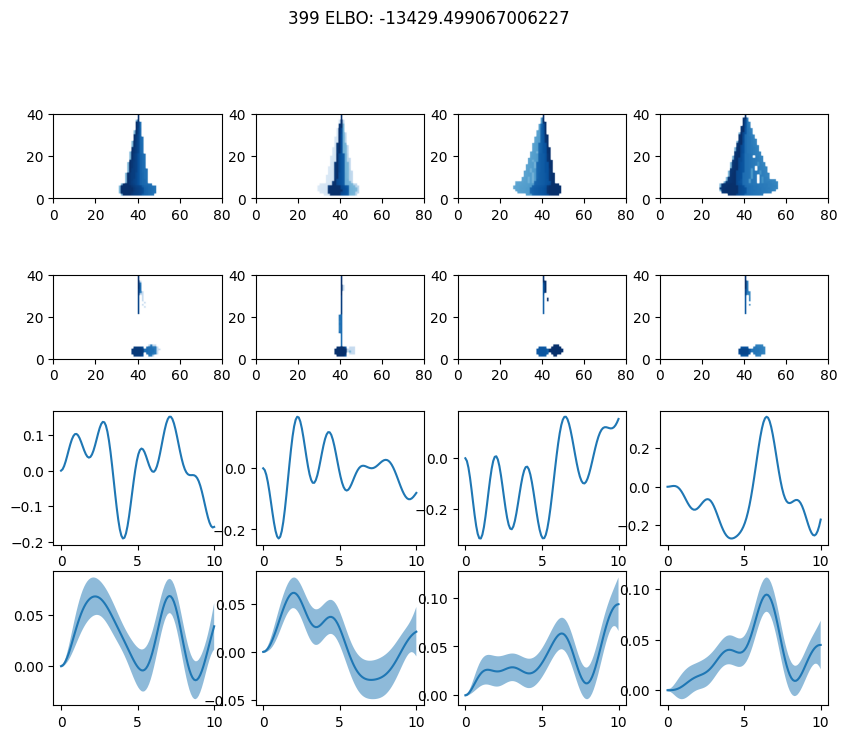

Frequency tensor(0.8870, device='cuda:0') 
Damping tensor(0.4936, device='cuda:0')


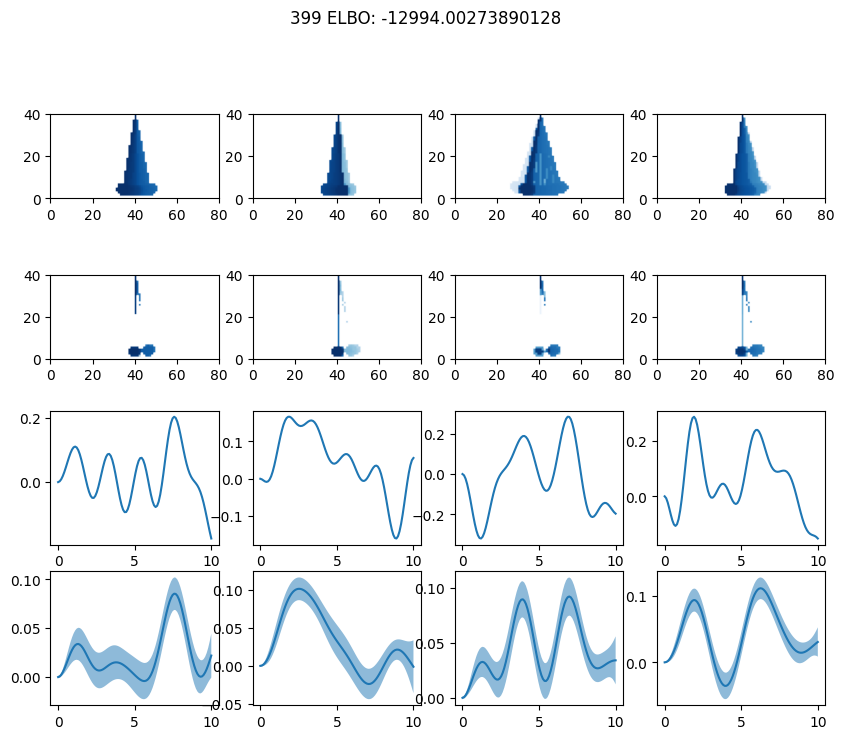

Frequency tensor(0.8870, device='cuda:0') 
Damping tensor(0.4936, device='cuda:0')


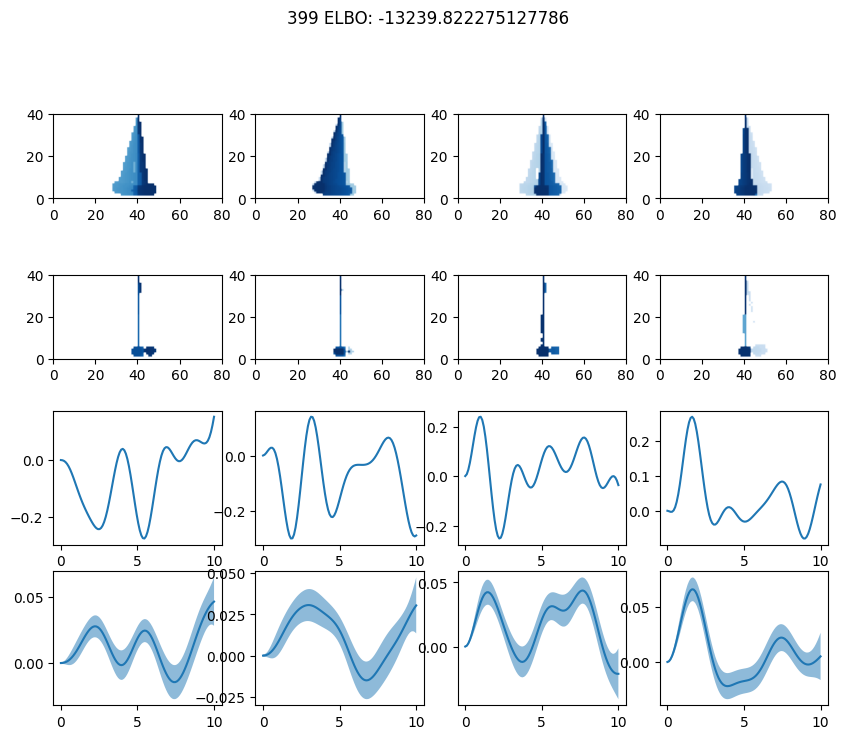

Frequency tensor(0.8870, device='cuda:0') 
Damping tensor(0.4936, device='cuda:0')


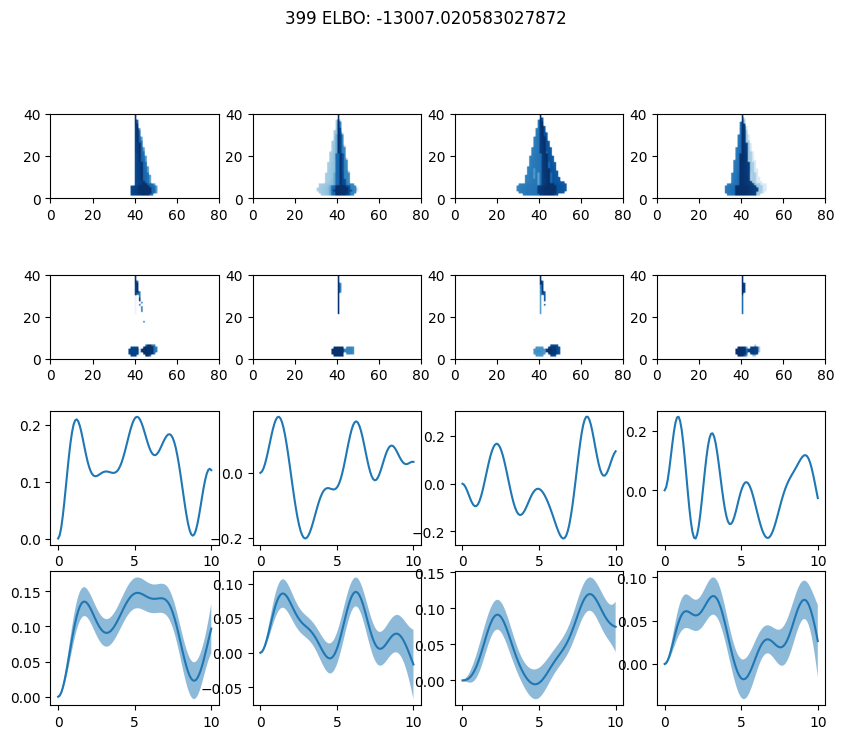

Frequency tensor(0.8870, device='cuda:0') 
Damping tensor(0.4936, device='cuda:0')


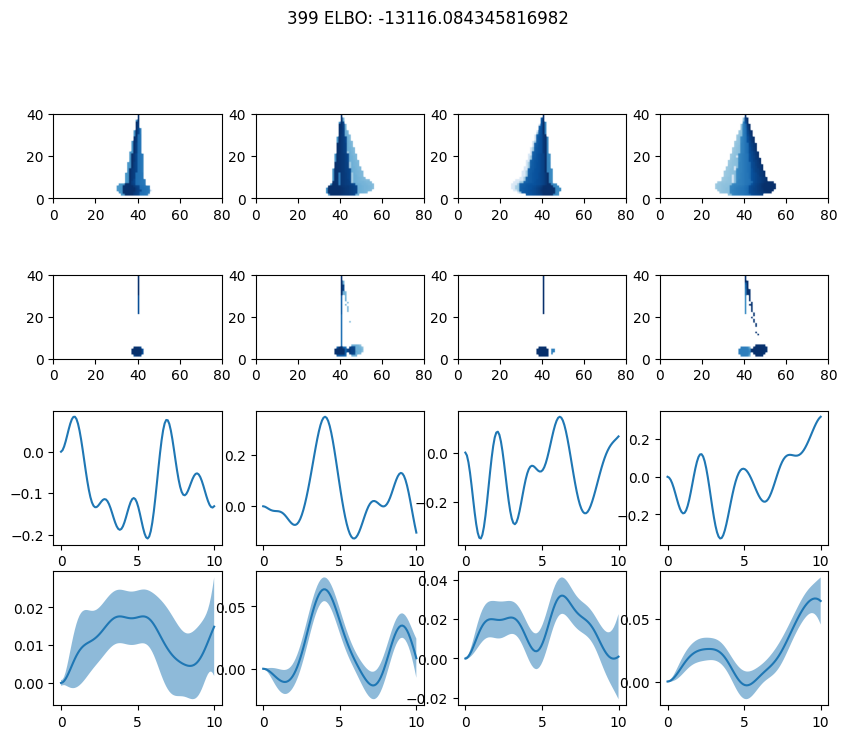

Frequency tensor(0.8870, device='cuda:0') 
Damping tensor(0.4936, device='cuda:0')


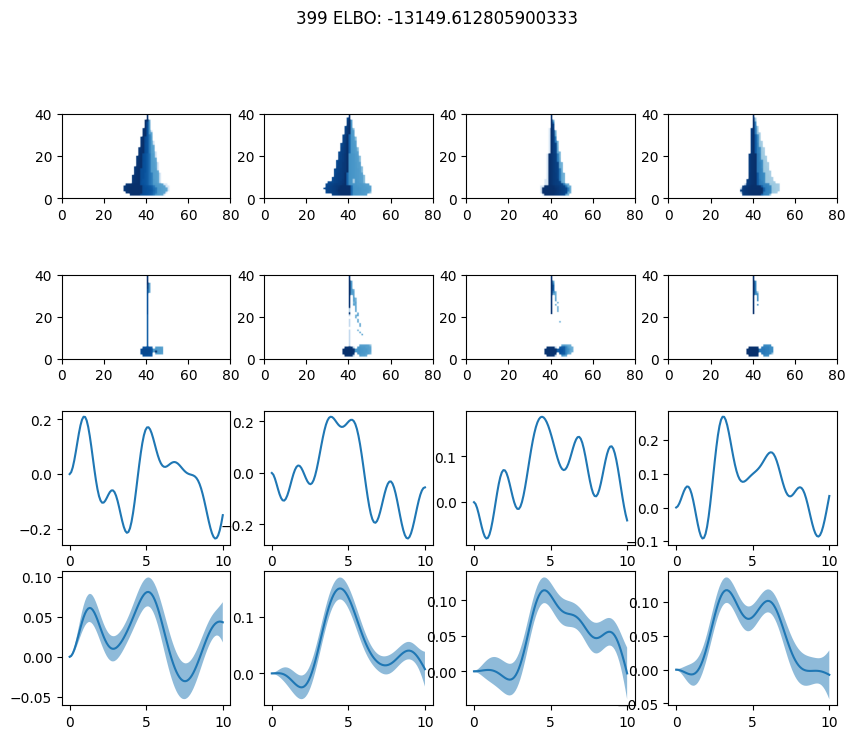

Frequency tensor(0.8870, device='cuda:0') 
Damping tensor(0.4936, device='cuda:0')


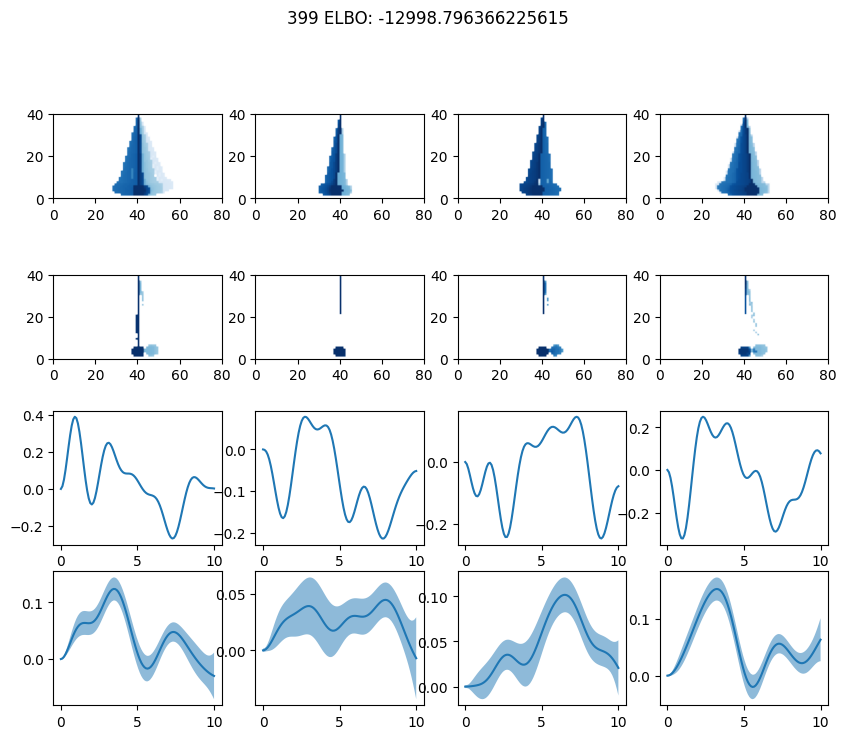

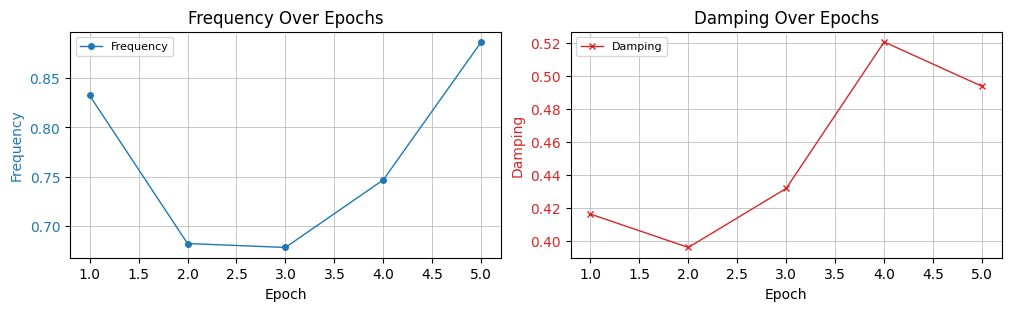

Validation: |                                             | 0/? [00:00<?, ?it/s]

Frequency tensor(1.0903, device='cuda:0') 
Damping tensor(0.3896, device='cuda:0')


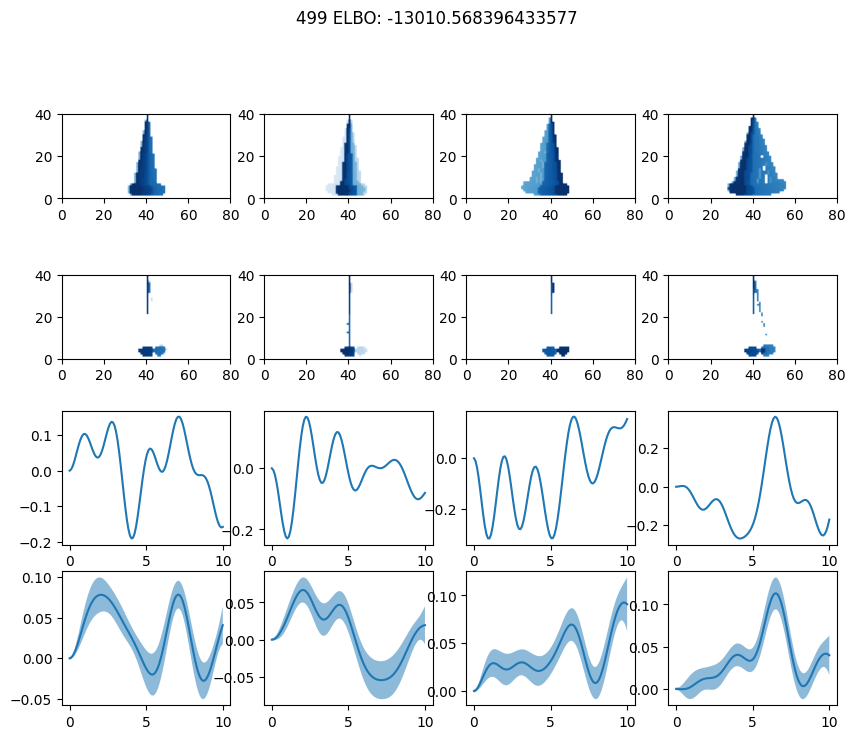

Frequency tensor(1.0903, device='cuda:0') 
Damping tensor(0.3896, device='cuda:0')


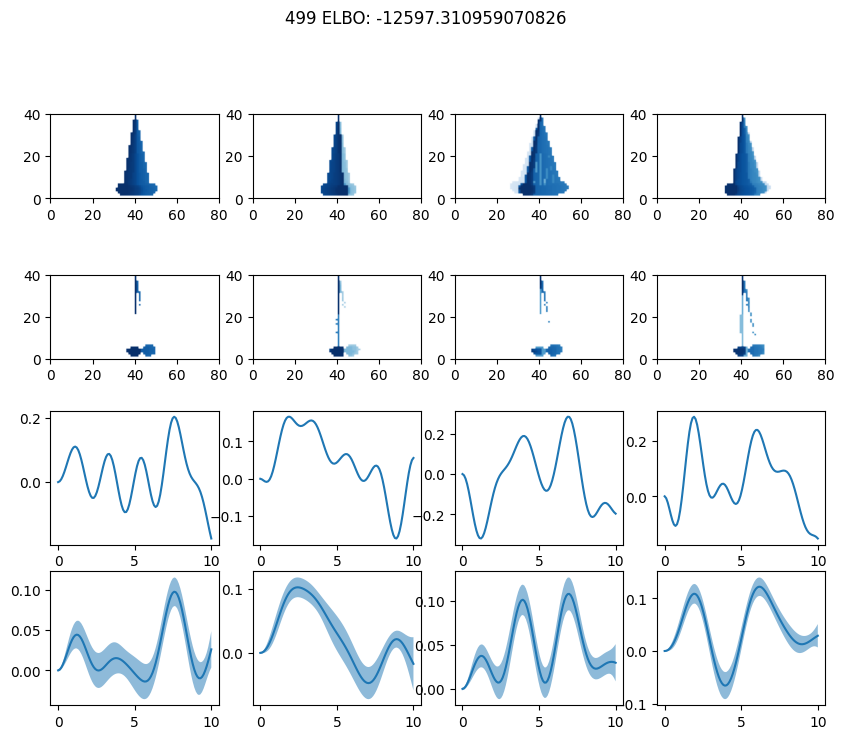

Frequency tensor(1.0903, device='cuda:0') 
Damping tensor(0.3896, device='cuda:0')


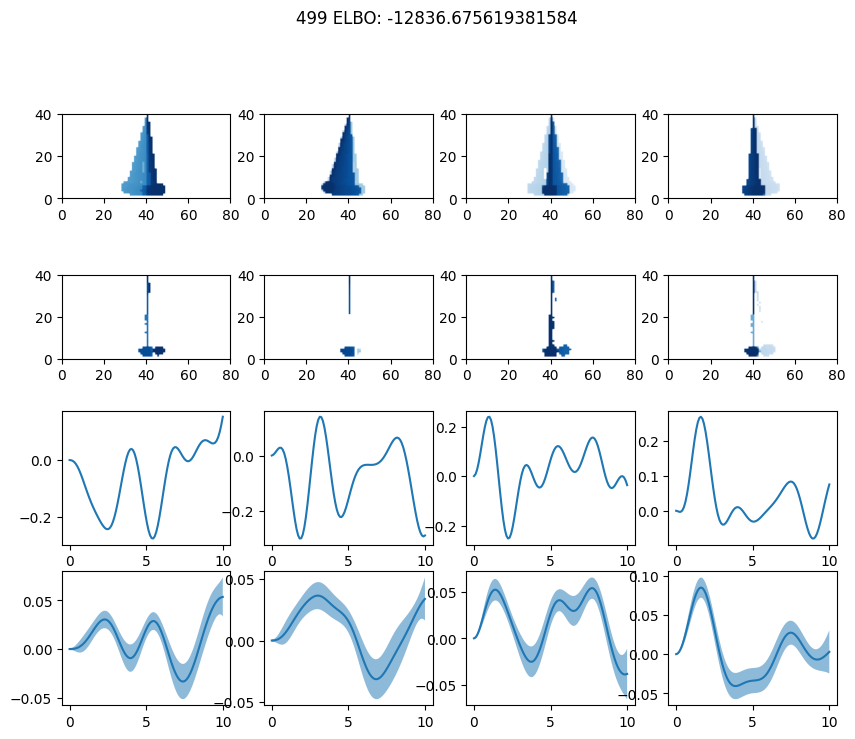

Frequency tensor(1.0903, device='cuda:0') 
Damping tensor(0.3896, device='cuda:0')


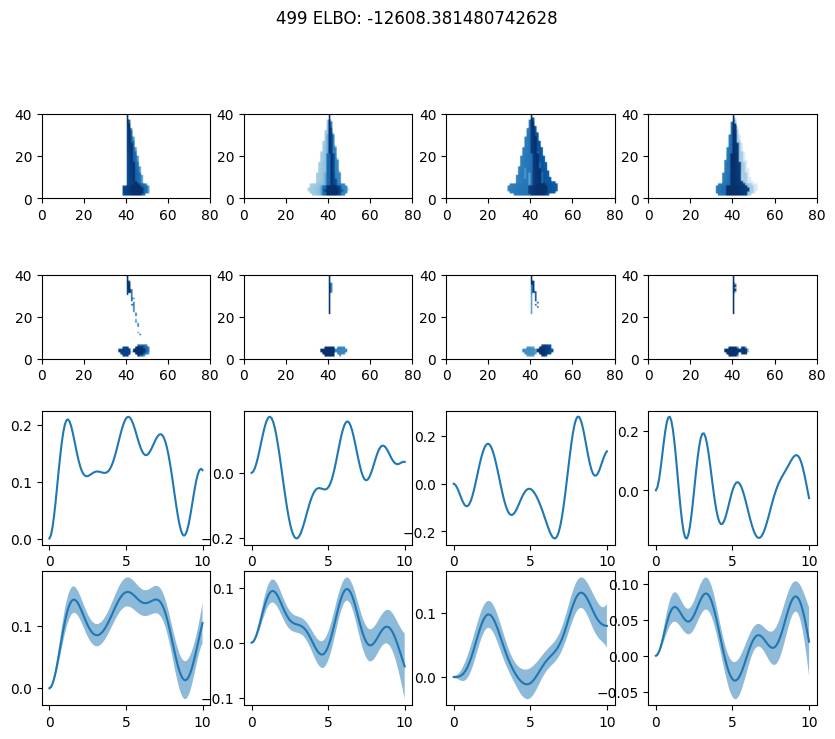

Frequency tensor(1.0903, device='cuda:0') 
Damping tensor(0.3896, device='cuda:0')


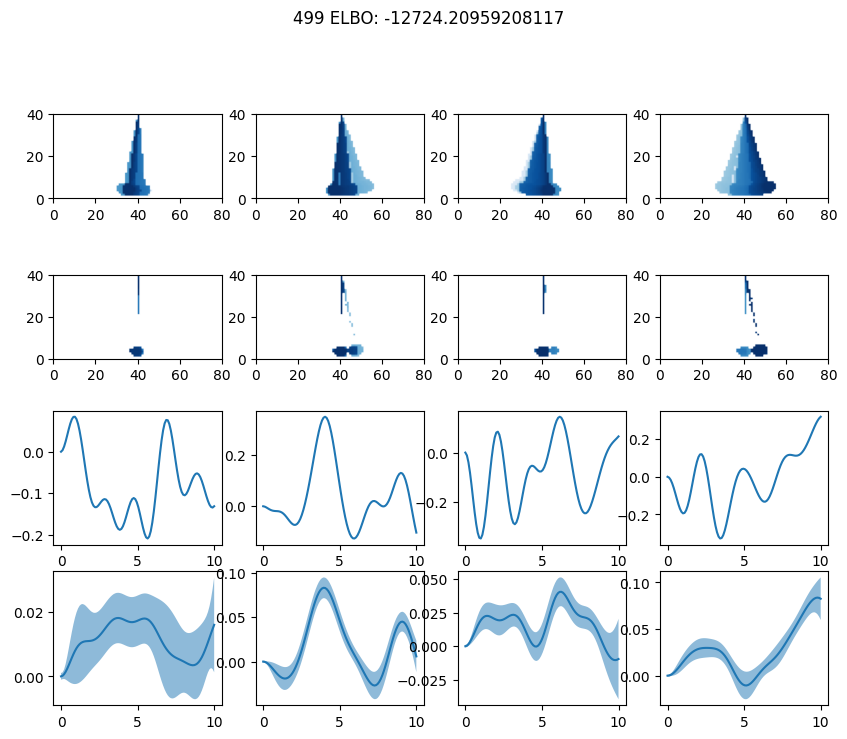

Frequency tensor(1.0903, device='cuda:0') 
Damping tensor(0.3896, device='cuda:0')


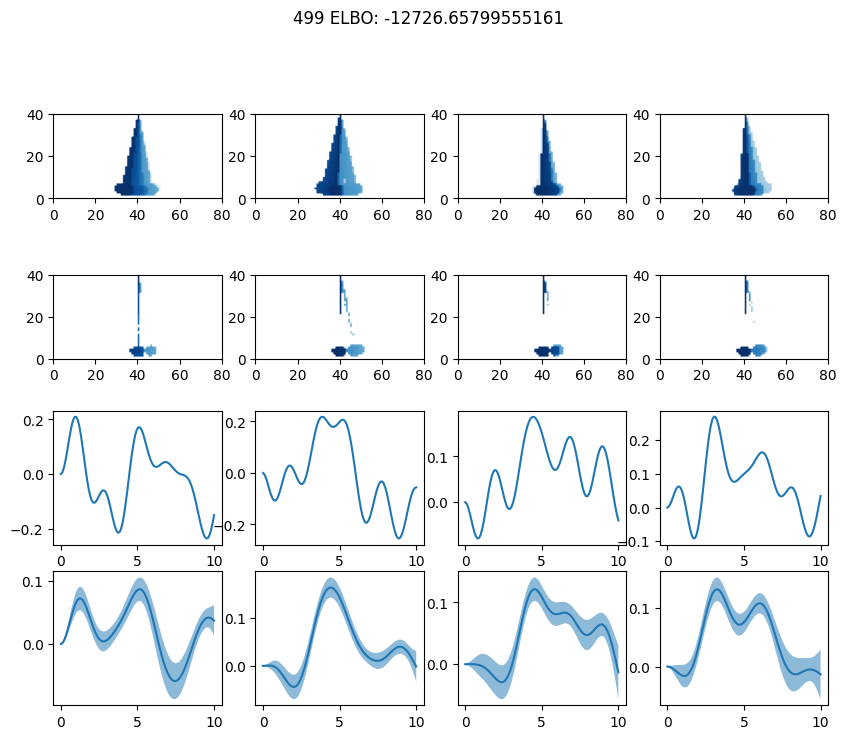

Frequency tensor(1.0903, device='cuda:0') 
Damping tensor(0.3896, device='cuda:0')


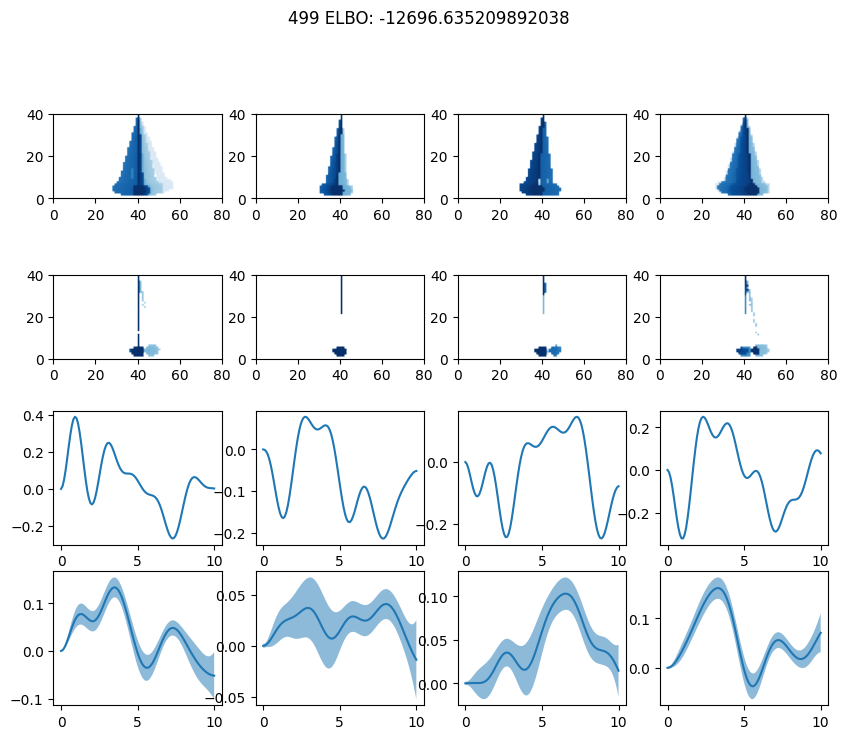

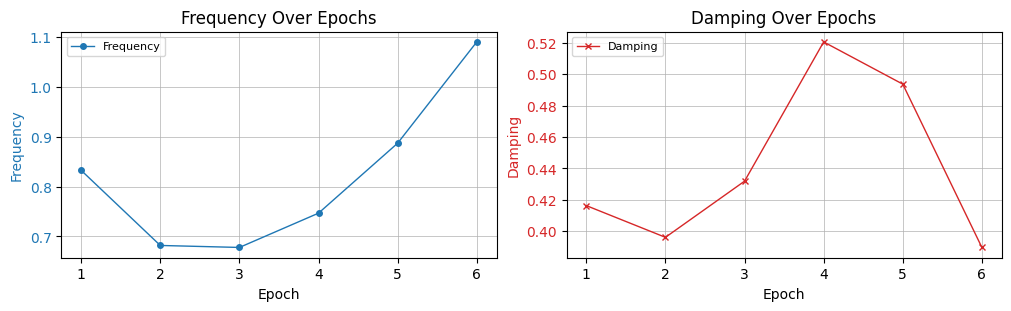

Validation: |                                             | 0/? [00:00<?, ?it/s]

Frequency tensor(1.3058, device='cuda:0') 
Damping tensor(0.3058, device='cuda:0')


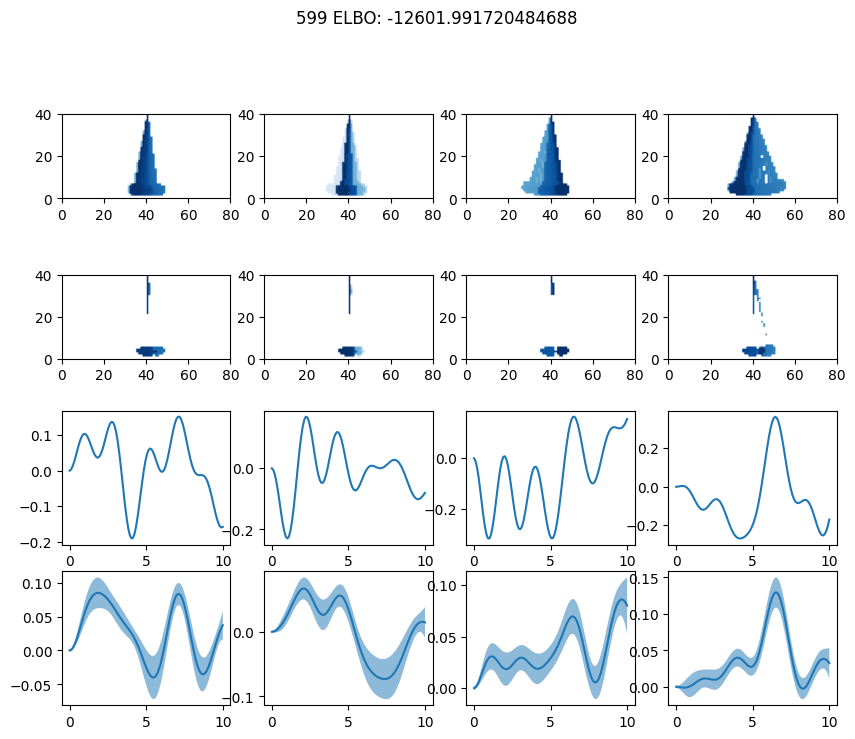

Frequency tensor(1.3058, device='cuda:0') 
Damping tensor(0.3058, device='cuda:0')


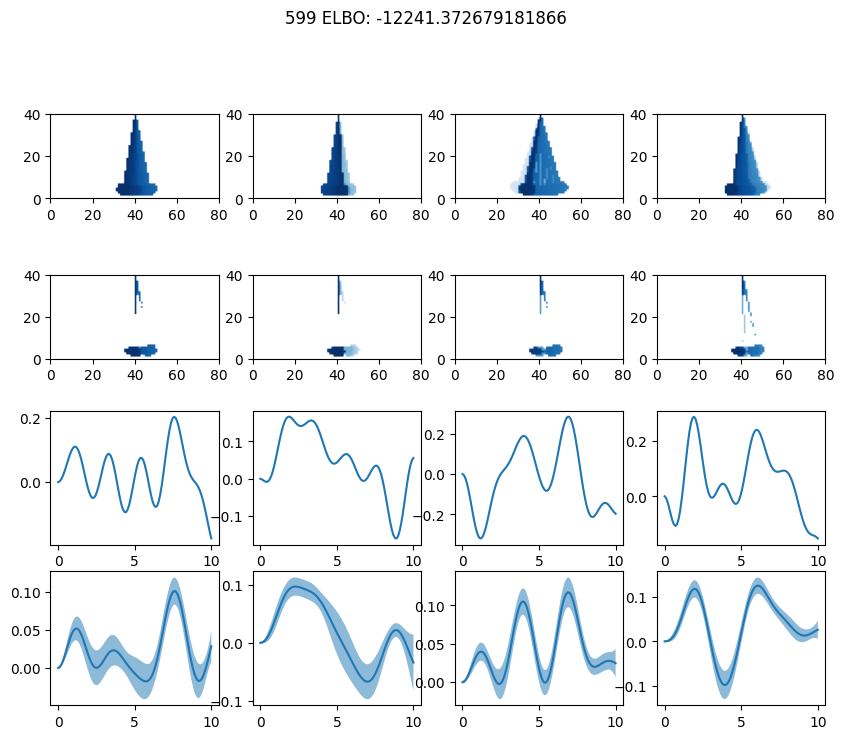

Frequency tensor(1.3058, device='cuda:0') 
Damping tensor(0.3058, device='cuda:0')


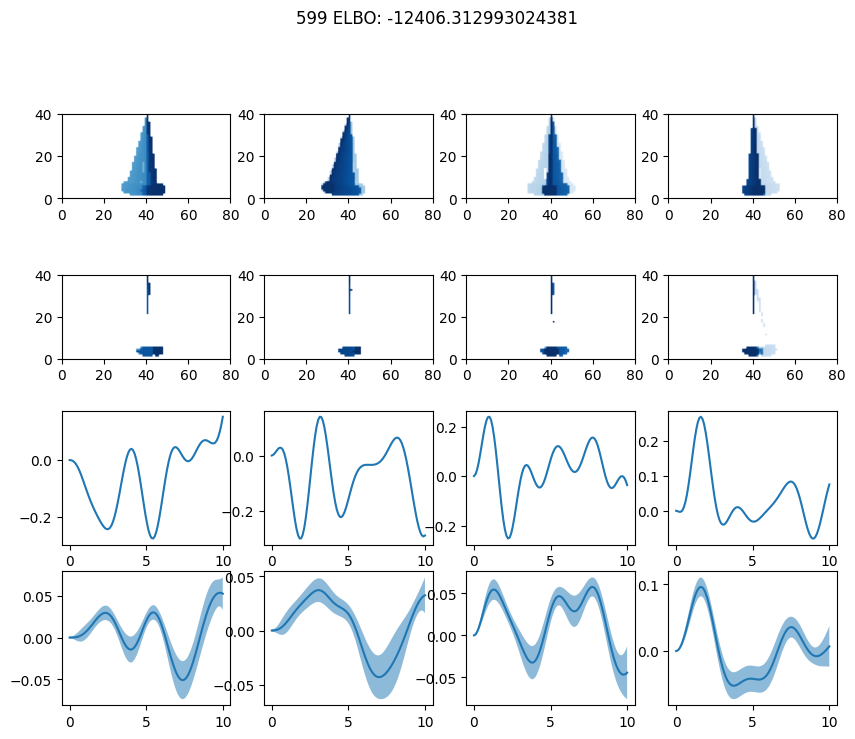

Frequency tensor(1.3058, device='cuda:0') 
Damping tensor(0.3058, device='cuda:0')


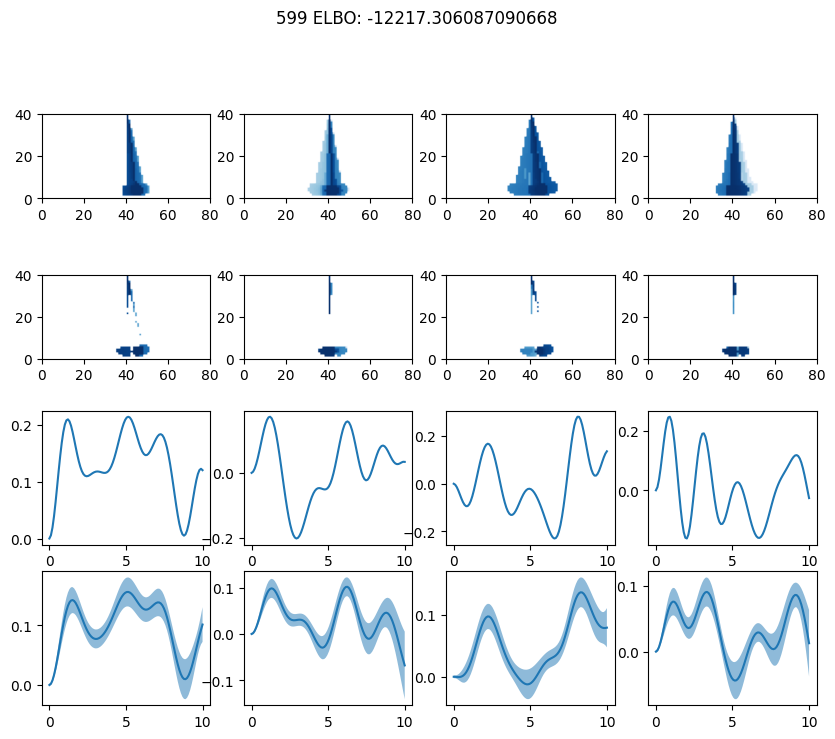

Frequency tensor(1.3058, device='cuda:0') 
Damping tensor(0.3058, device='cuda:0')


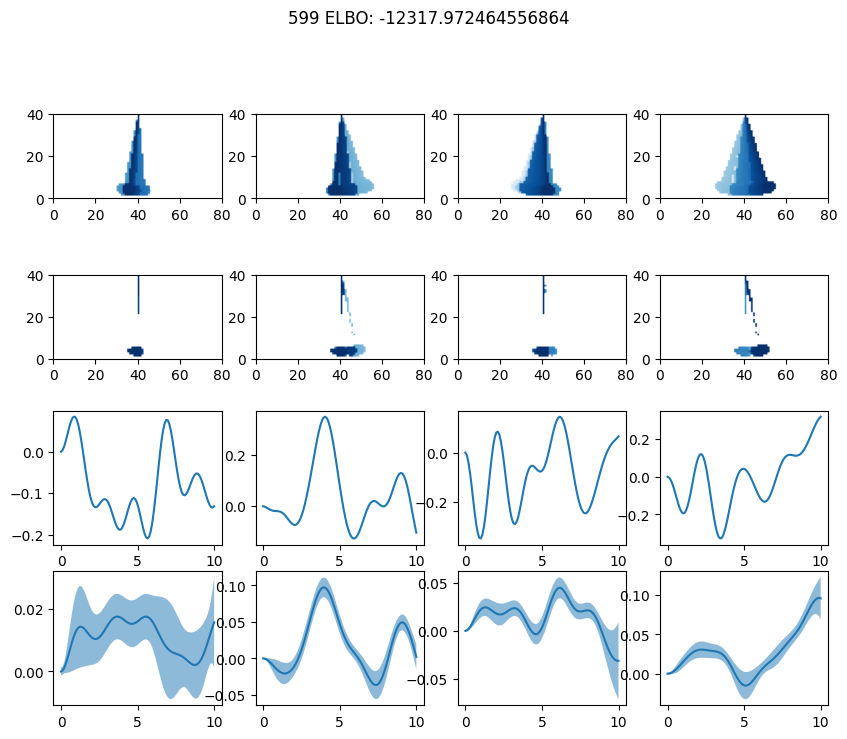

Frequency tensor(1.3058, device='cuda:0') 
Damping tensor(0.3058, device='cuda:0')


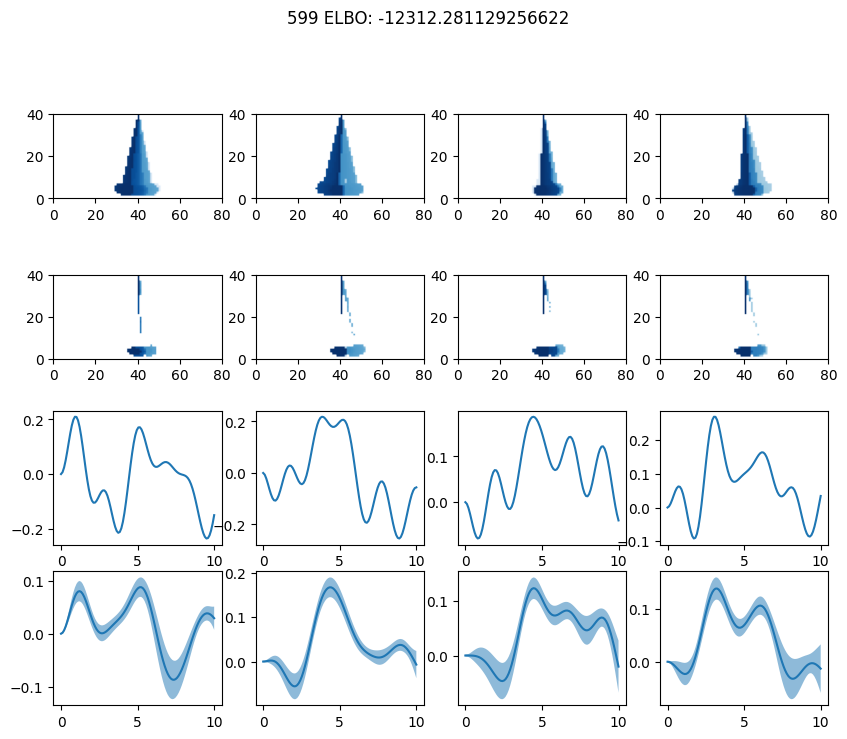

Frequency tensor(1.3058, device='cuda:0') 
Damping tensor(0.3058, device='cuda:0')


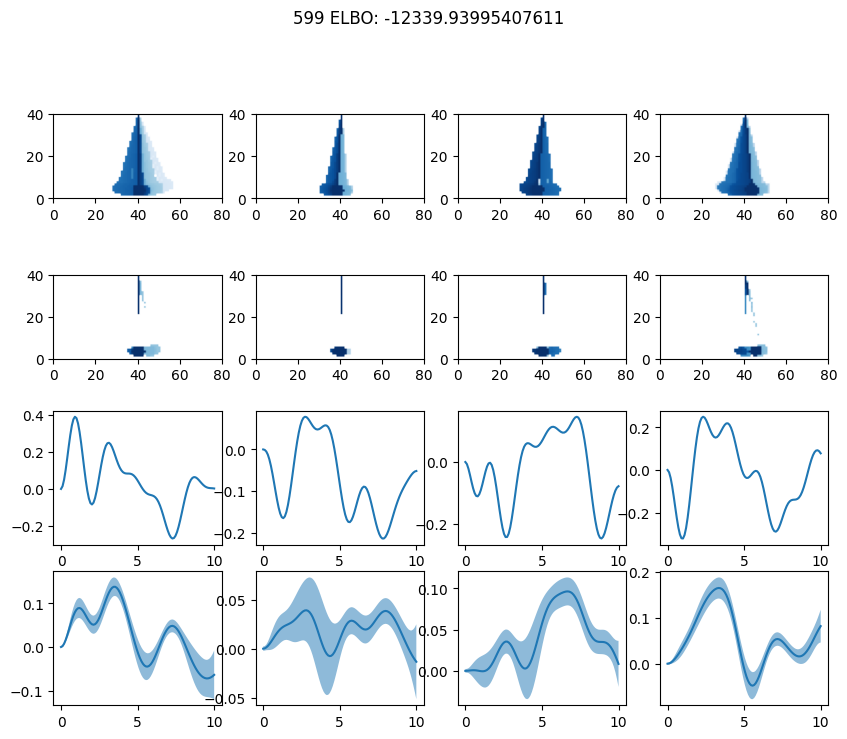

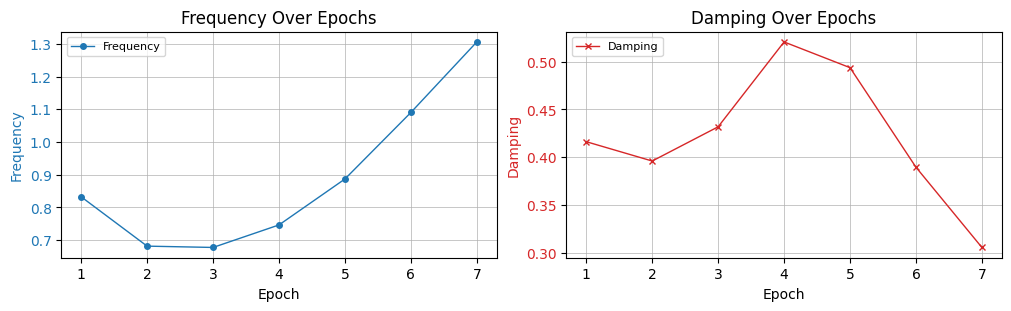

Validation: |                                             | 0/? [00:00<?, ?it/s]

Frequency tensor(1.4982, device='cuda:0') 
Damping tensor(0.2436, device='cuda:0')


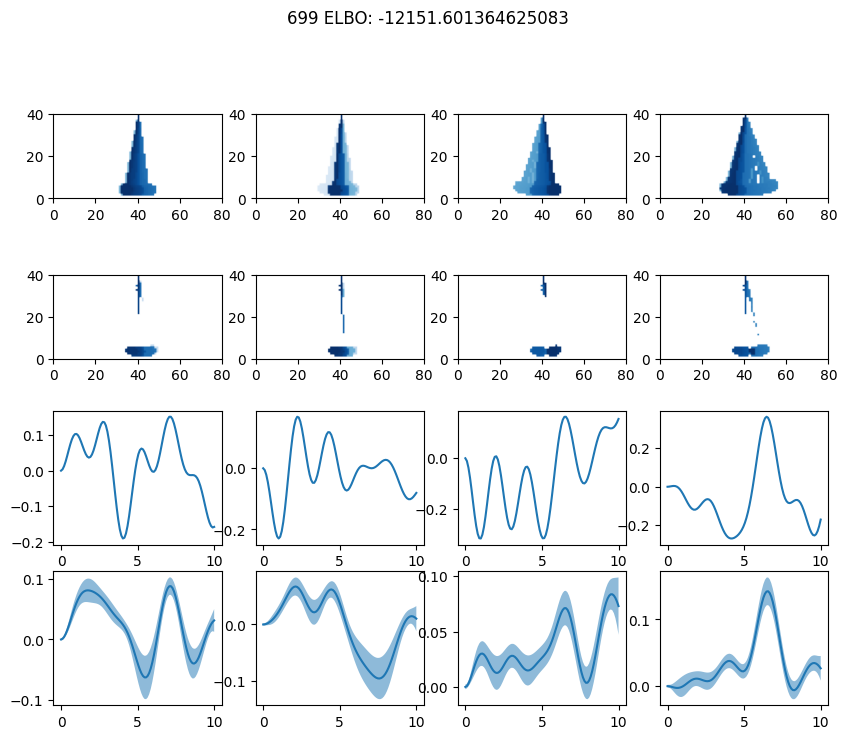

Frequency tensor(1.4982, device='cuda:0') 
Damping tensor(0.2436, device='cuda:0')


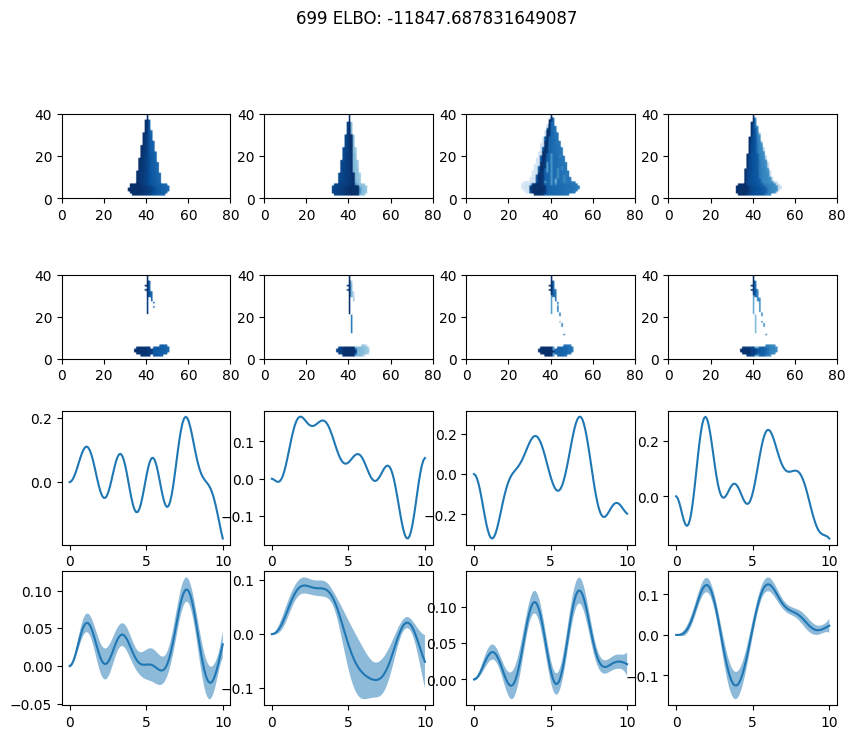

Frequency tensor(1.4982, device='cuda:0') 
Damping tensor(0.2436, device='cuda:0')


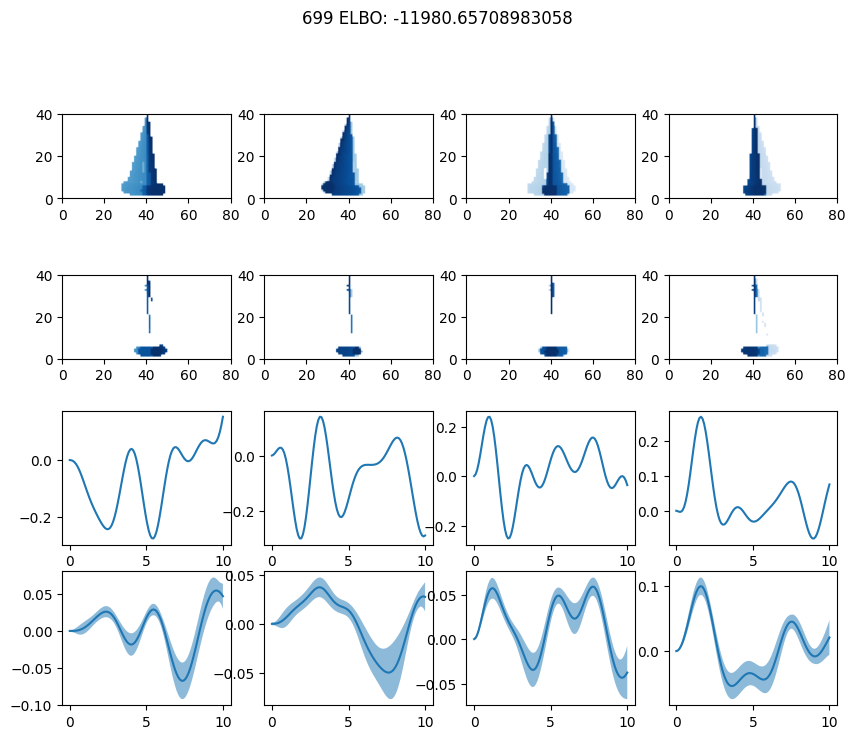

Frequency tensor(1.4982, device='cuda:0') 
Damping tensor(0.2436, device='cuda:0')


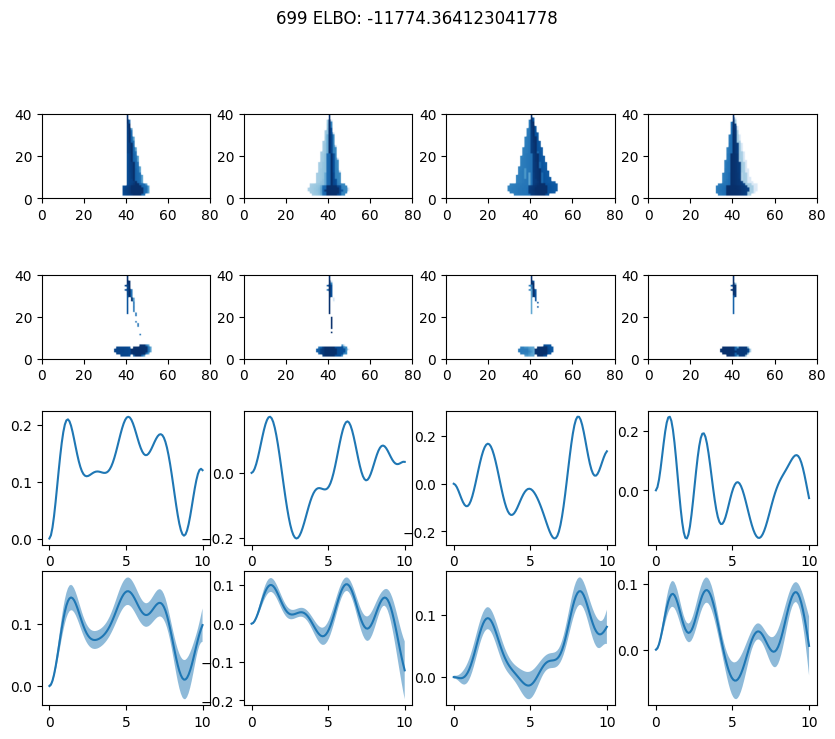

Frequency tensor(1.4982, device='cuda:0') 
Damping tensor(0.2436, device='cuda:0')


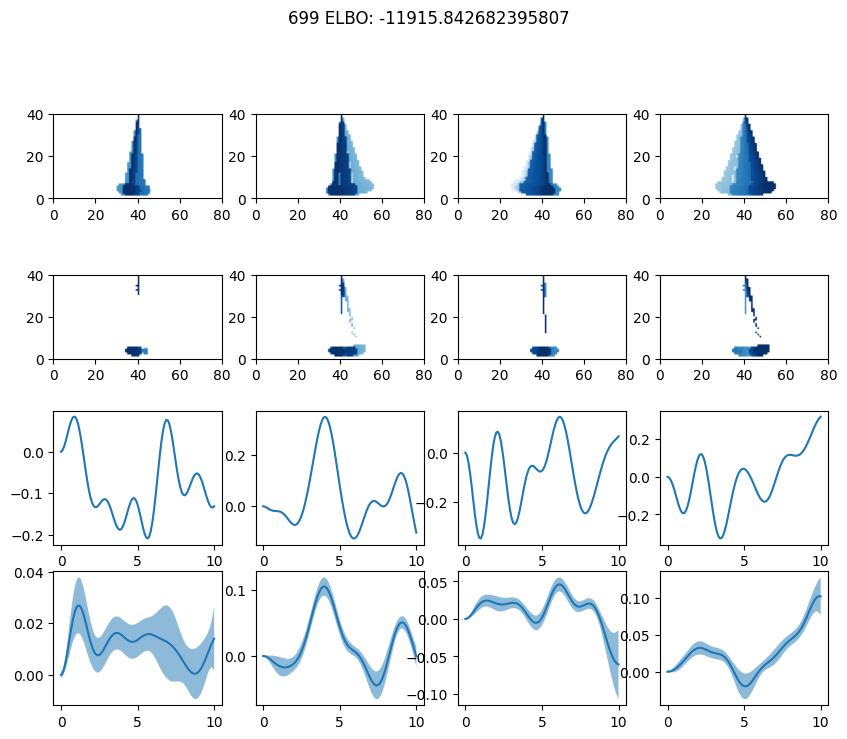

Frequency tensor(1.4982, device='cuda:0') 
Damping tensor(0.2436, device='cuda:0')


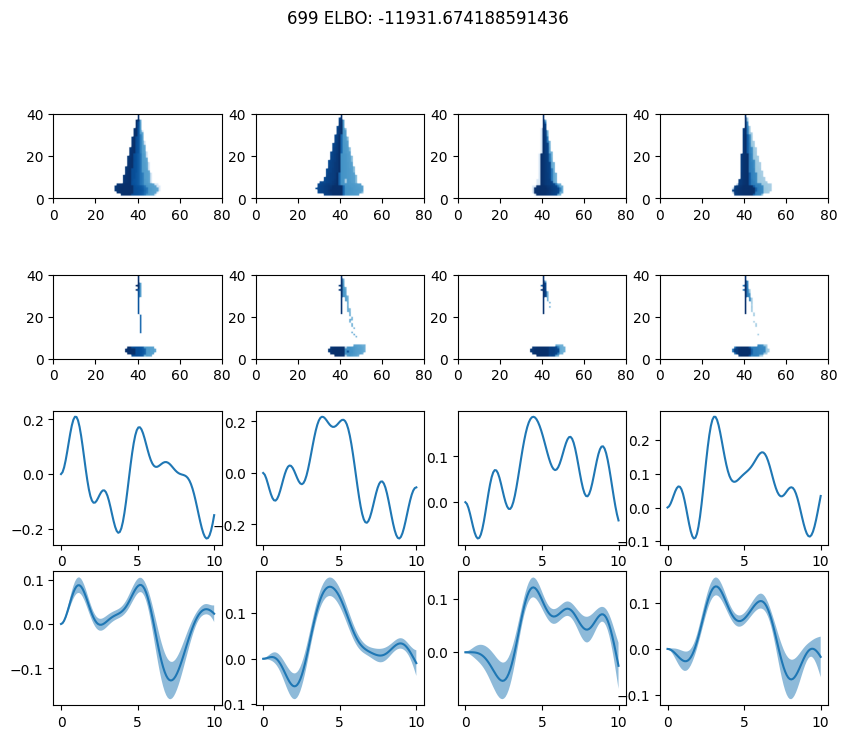

Frequency tensor(1.4982, device='cuda:0') 
Damping tensor(0.2436, device='cuda:0')


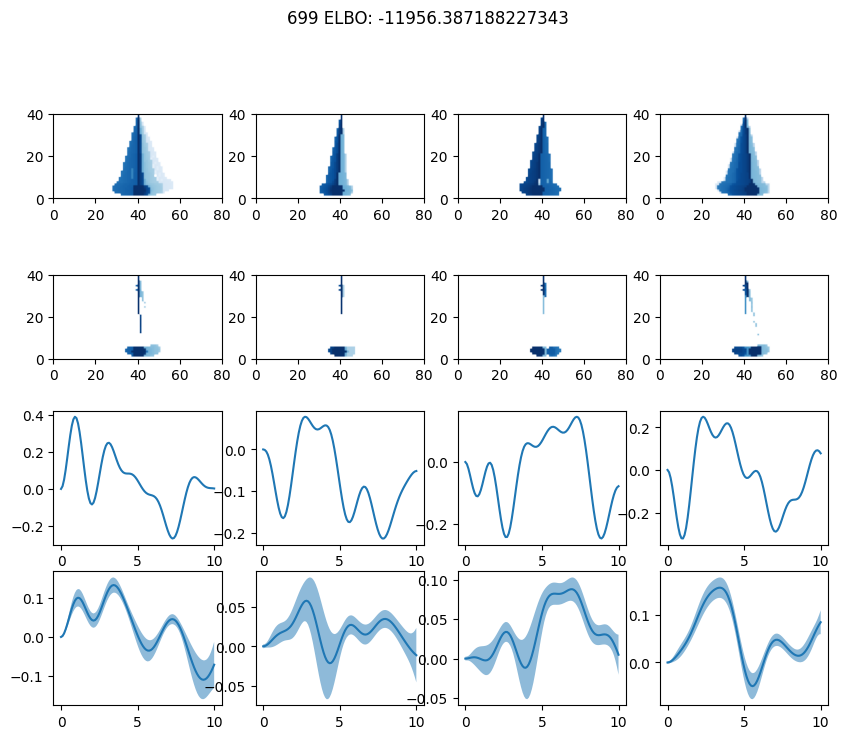

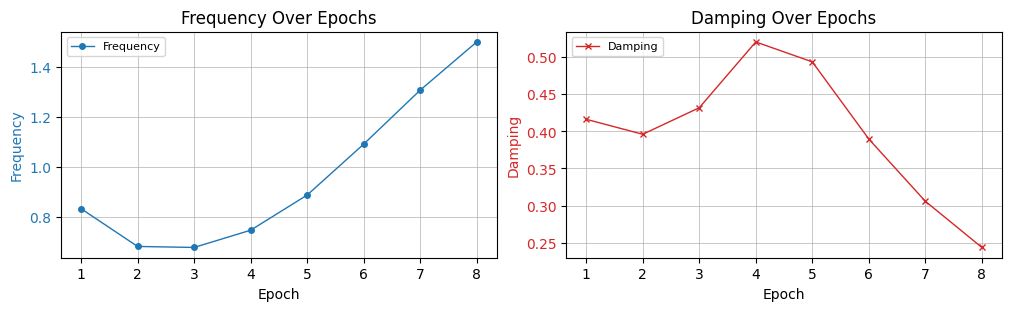

In [ ]:
trainer.fit(model, datamodule=data_module)